## Convolutional Neural Networks: Dog Breed Identification

## Step 1: Detect Dogs

In [33]:
# Import Torch
import torch
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(dev)

cpu


In [34]:
# Imports
import torchvision.models as models

# Instantiate Inception model
# HINTS:
# - check the documentation: https://pytorch.org/vision/stable/models.html
# - make sure you use the pretrained version
inception = models.inception_v3(pretrained=True)

# Put model in evaluation mode
inception.eval()

# Move model to device
# Select device
print(f"CUDA is available? {torch.cuda.is_available()}")
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(dev)

CUDA is available? False
cpu


In [35]:
model = inception.to(dev)

In [36]:
import torchvision.transforms as T

# Define transform for Inception model
norm_mean = (0.485, 0.456, 0.406)
norm_std = (0.229, 0.224, 0.225)

# Define single transforms
resize = T.Resize(299) # This won't do anything, since images are already at that size
random_crop = T.RandomCrop(28) # train
random_hor_flip = T.RandomHorizontalFlip() # train
center_crop = T.CenterCrop(299) # test
to_tensor = T.ToTensor()
normalize = T.Normalize(norm_mean, norm_std)

inception_transform = T.Compose([resize, center_crop, to_tensor, normalize])

In [37]:
# Define root directory from Google Drive
from google.colab import drive
drive.mount("/content/drive/")
root_dir = "/content/drive/My Drive/dog_classification_data/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [38]:
#print(inception)

####classmap

In [39]:
# ImageNet class map
class_names = {0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mud puppy, Ambystoma mexicanum', 30: 'bullfrog, Rana catesbeiana', 31: 'tree frog, tree-frog', 32: 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui', 33: 'loggerhead, loggerhead turtle, Caretta caretta', 34: 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea', 35: 'mud turtle', 36: 'terrapin', 37: 'box turtle, box tortoise', 38: 'banded gecko', 39: 'common iguana, iguana, Iguana iguana', 40: 'American chameleon, anole, Anolis carolinensis', 41: 'whiptail, whiptail lizard', 42: 'agama', 43: 'frilled lizard, Chlamydosaurus kingi', 44: 'alligator lizard', 45: 'Gila monster, Heloderma suspectum', 46: 'green lizard, Lacerta viridis', 47: 'African chameleon, Chamaeleo chamaeleon', 48: 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis', 49: 'African crocodile, Nile crocodile, Crocodylus niloticus', 50: 'American alligator, Alligator mississipiensis', 51: 'triceratops', 52: 'thunder snake, worm snake, Carphophis amoenus', 53: 'ringneck snake, ring-necked snake, ring snake', 54: 'hognose snake, puff adder, sand viper', 55: 'green snake, grass snake', 56: 'king snake, kingsnake', 57: 'garter snake, grass snake', 58: 'water snake', 59: 'vine snake', 60: 'night snake, Hypsiglena torquata', 61: 'boa constrictor, Constrictor constrictor', 62: 'rock python, rock snake, Python sebae', 63: 'Indian cobra, Naja naja', 64: 'green mamba', 65: 'sea snake', 66: 'horned viper, cerastes, sand viper, horned asp, Cerastes cornutus', 67: 'diamondback, diamondback rattlesnake, Crotalus adamanteus', 68: 'sidewinder, horned rattlesnake, Crotalus cerastes', 69: 'trilobite', 70: 'harvestman, daddy longlegs, Phalangium opilio', 71: 'scorpion', 72: 'black and gold garden spider, Argiope aurantia', 73: 'barn spider, Araneus cavaticus', 74: 'garden spider, Aranea diademata', 75: 'black widow, Latrodectus mactans', 76: 'tarantula', 77: 'wolf spider, hunting spider', 78: 'tick', 79: 'centipede', 80: 'black grouse', 81: 'ptarmigan', 82: 'ruffed grouse, partridge, Bonasa umbellus', 83: 'prairie chicken, prairie grouse, prairie fowl', 84: 'peacock', 85: 'quail', 86: 'partridge', 87: 'African grey, African gray, Psittacus erithacus', 88: 'macaw', 89: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 90: 'lorikeet', 91: 'coucal', 92: 'bee eater', 93: 'hornbill', 94: 'hummingbird', 95: 'jacamar', 96: 'toucan', 97: 'drake', 98: 'red-breasted merganser, Mergus serrator', 99: 'goose', 100: 'black swan, Cygnus atratus', 101: 'tusker', 102: 'echidna, spiny anteater, anteater', 103: 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus', 104: 'wallaby, brush kangaroo', 105: 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus', 106: 'wombat', 107: 'jellyfish', 108: 'sea anemone, anemone', 109: 'brain coral', 110: 'flatworm, platyhelminth', 111: 'nematode, nematode worm, roundworm', 112: 'conch', 113: 'snail', 114: 'slug', 115: 'sea slug, nudibranch', 116: 'chiton, coat-of-mail shell, sea cradle, polyplacophore', 117: 'chambered nautilus, pearly nautilus, nautilus', 118: 'Dungeness crab, Cancer magister', 119: 'rock crab, Cancer irroratus', 120: 'fiddler crab', 121: 'king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica', 122: 'American lobster, Northern lobster, Maine lobster, Homarus americanus', 123: 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish', 124: 'crayfish, crawfish, crawdad, crawdaddy', 125: 'hermit crab', 126: 'isopod', 127: 'white stork, Ciconia ciconia', 128: 'black stork, Ciconia nigra', 129: 'spoonbill', 130: 'flamingo', 131: 'little blue heron, Egretta caerulea', 132: 'American egret, great white heron, Egretta albus', 133: 'bittern', 134: 'crane', 135: 'limpkin, Aramus pictus', 136: 'European gallinule, Porphyrio porphyrio', 137: 'American coot, marsh hen, mud hen, water hen, Fulica americana', 138: 'bustard', 139: 'ruddy turnstone, Arenaria interpres', 140: 'red-backed sandpiper, dunlin, Erolia alpina', 141: 'redshank, Tringa totanus', 142: 'dowitcher', 143: 'oystercatcher, oyster catcher', 144: 'pelican', 145: 'king penguin, Aptenodytes patagonica', 146: 'albatross, mollymawk', 147: 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus', 148: 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca', 149: 'dugong, Dugong dugon', 150: 'sea lion', 151: 'Chihuahua', 152: 'Japanese spaniel', 153: 'Maltese dog, Maltese terrier, Maltese', 154: 'Pekinese, Pekingese, Peke', 155: 'Shih-Tzu', 156: 'Blenheim spaniel', 157: 'papillon', 158: 'toy terrier', 159: 'Rhodesian ridgeback', 160: 'Afghan hound, Afghan', 161: 'basset, basset hound', 162: 'beagle', 163: 'bloodhound, sleuthhound', 164: 'bluetick', 165: 'black-and-tan coonhound', 166: 'Walker hound, Walker foxhound', 167: 'English foxhound', 168: 'redbone', 169: 'borzoi, Russian wolfhound', 170: 'Irish wolfhound', 171: 'Italian greyhound', 172: 'whippet', 173: 'Ibizan hound, Ibizan Podenco', 174: 'Norwegian elkhound, elkhound', 175: 'otterhound, otter hound', 176: 'Saluki, gazelle hound', 177: 'Scottish deerhound, deerhound', 178: 'Weimaraner', 179: 'Staffordshire bullterrier, Staffordshire bull terrier', 180: 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', 181: 'Bedlington terrier', 182: 'Border terrier', 183: 'Kerry blue terrier', 184: 'Irish terrier', 185: 'Norfolk terrier', 186: 'Norwich terrier', 187: 'Yorkshire terrier', 188: 'wire-haired fox terrier', 189: 'Lakeland terrier', 190: 'Sealyham terrier, Sealyham', 191: 'Airedale, Airedale terrier', 192: 'cairn, cairn terrier', 193: 'Australian terrier', 194: 'Dandie Dinmont, Dandie Dinmont terrier', 195: 'Boston bull, Boston terrier', 196: 'miniature schnauzer', 197: 'giant schnauzer', 198: 'standard schnauzer', 199: 'Scotch terrier, Scottish terrier, Scottie', 200: 'Tibetan terrier, chrysanthemum dog', 201: 'silky terrier, Sydney silky', 202: 'soft-coated wheaten terrier', 203: 'West Highland white terrier', 204: 'Lhasa, Lhasa apso', 205: 'flat-coated retriever', 206: 'curly-coated retriever', 207: 'golden retriever', 208: 'Labrador retriever', 209: 'Chesapeake Bay retriever', 210: 'German short-haired pointer', 211: 'vizsla, Hungarian pointer', 212: 'English setter', 213: 'Irish setter, red setter', 214: 'Gordon setter', 215: 'Brittany spaniel', 216: 'clumber, clumber spaniel', 217: 'English springer, English springer spaniel', 218: 'Welsh springer spaniel', 219: 'cocker spaniel, English cocker spaniel, cocker', 220: 'Sussex spaniel', 221: 'Irish water spaniel', 222: 'kuvasz', 223: 'schipperke', 224: 'groenendael', 225: 'malinois', 226: 'briard', 227: 'kelpie', 228: 'komondor', 229: 'Old English sheepdog, bobtail', 230: 'Shetland sheepdog, Shetland sheep dog, Shetland', 231: 'collie', 232: 'Border collie', 233: 'Bouvier des Flandres, Bouviers des Flandres', 234: 'Rottweiler', 235: 'German shepherd, German shepherd dog, German police dog, alsatian', 236: 'Doberman, Doberman pinscher', 237: 'miniature pinscher', 238: 'Greater Swiss Mountain dog', 239: 'Bernese mountain dog', 240: 'Appenzeller', 241: 'EntleBucher', 242: 'boxer', 243: 'bull mastiff', 244: 'Tibetan mastiff', 245: 'French bulldog', 246: 'Great Dane', 247: 'Saint Bernard, St Bernard', 248: 'Eskimo dog, husky', 249: 'malamute, malemute, Alaskan malamute', 250: 'Siberian husky', 251: 'dalmatian, coach dog, carriage dog', 252: 'affenpinscher, monkey pinscher, monkey dog', 253: 'basenji', 254: 'pug, pug-dog', 255: 'Leonberg', 256: 'Newfoundland, Newfoundland dog', 257: 'Great Pyrenees', 258: 'Samoyed, Samoyede', 259: 'Pomeranian', 260: 'chow, chow chow', 261: 'keeshond', 262: 'Brabancon griffon', 263: 'Pembroke, Pembroke Welsh corgi', 264: 'Cardigan, Cardigan Welsh corgi', 265: 'toy poodle', 266: 'miniature poodle', 267: 'standard poodle', 268: 'Mexican hairless', 269: 'timber wolf, grey wolf, gray wolf, Canis lupus', 270: 'white wolf, Arctic wolf, Canis lupus tundrarum', 271: 'red wolf, maned wolf, Canis rufus, Canis niger', 272: 'coyote, prairie wolf, brush wolf, Canis latrans', 273: 'dingo, warrigal, warragal, Canis dingo', 274: 'dhole, Cuon alpinus', 275: 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus', 276: 'hyena, hyaena', 277: 'red fox, Vulpes vulpes', 278: 'kit fox, Vulpes macrotis', 279: 'Arctic fox, white fox, Alopex lagopus', 280: 'grey fox, gray fox, Urocyon cinereoargenteus', 281: 'tabby, tabby cat', 282: 'tiger cat', 283: 'Persian cat', 284: 'Siamese cat, Siamese', 285: 'Egyptian cat', 286: 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 287: 'lynx, catamount', 288: 'leopard, Panthera pardus', 289: 'snow leopard, ounce, Panthera uncia', 290: 'jaguar, panther, Panthera onca, Felis onca', 291: 'lion, king of beasts, Panthera leo', 292: 'tiger, Panthera tigris', 293: 'cheetah, chetah, Acinonyx jubatus', 294: 'brown bear, bruin, Ursus arctos', 295: 'American black bear, black bear, Ursus americanus, Euarctos americanus', 296: 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus', 297: 'sloth bear, Melursus ursinus, Ursus ursinus', 298: 'mongoose', 299: 'meerkat, mierkat', 300: 'tiger beetle', 301: 'ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle', 302: 'ground beetle, carabid beetle', 303: 'long-horned beetle, longicorn, longicorn beetle', 304: 'leaf beetle, chrysomelid', 305: 'dung beetle', 306: 'rhinoceros beetle', 307: 'weevil', 308: 'fly', 309: 'bee', 310: 'ant, emmet, pismire', 311: 'grasshopper, hopper', 312: 'cricket', 313: 'walking stick, walkingstick, stick insect', 314: 'cockroach, roach', 315: 'mantis, mantid', 316: 'cicada, cicala', 317: 'leafhopper', 318: 'lacewing, lacewing fly', 319: "dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk", 320: 'damselfly', 321: 'admiral', 322: 'ringlet, ringlet butterfly', 323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus', 324: 'cabbage butterfly', 325: 'sulphur butterfly, sulfur butterfly', 326: 'lycaenid, lycaenid butterfly', 327: 'starfish, sea star', 328: 'sea urchin', 329: 'sea cucumber, holothurian', 330: 'wood rabbit, cottontail, cottontail rabbit', 331: 'hare', 332: 'Angora, Angora rabbit', 333: 'hamster', 334: 'porcupine, hedgehog', 335: 'fox squirrel, eastern fox squirrel, Sciurus niger', 336: 'marmot', 337: 'beaver', 338: 'guinea pig, Cavia cobaya', 339: 'sorrel', 340: 'zebra', 341: 'hog, pig, grunter, squealer, Sus scrofa', 342: 'wild boar, boar, Sus scrofa', 343: 'warthog', 344: 'hippopotamus, hippo, river horse, Hippopotamus amphibius', 345: 'ox', 346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis', 347: 'bison', 348: 'ram, tup', 349: 'bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis', 350: 'ibex, Capra ibex', 351: 'hartebeest', 352: 'impala, Aepyceros melampus', 353: 'gazelle', 354: 'Arabian camel, dromedary, Camelus dromedarius', 355: 'llama', 356: 'weasel', 357: 'mink', 358: 'polecat, fitch, foulmart, foumart, Mustela putorius', 359: 'black-footed ferret, ferret, Mustela nigripes', 360: 'otter', 361: 'skunk, polecat, wood pussy', 362: 'badger', 363: 'armadillo', 364: 'three-toed sloth, ai, Bradypus tridactylus', 365: 'orangutan, orang, orangutang, Pongo pygmaeus', 366: 'gorilla, Gorilla gorilla', 367: 'chimpanzee, chimp, Pan troglodytes', 368: 'gibbon, Hylobates lar', 369: 'siamang, Hylobates syndactylus, Symphalangus syndactylus', 370: 'guenon, guenon monkey', 371: 'patas, hussar monkey, Erythrocebus patas', 372: 'baboon', 373: 'macaque', 374: 'langur', 375: 'colobus, colobus monkey', 376: 'proboscis monkey, Nasalis larvatus', 377: 'marmoset', 378: 'capuchin, ringtail, Cebus capucinus', 379: 'howler monkey, howler', 380: 'titi, titi monkey', 381: 'spider monkey, Ateles geoffroyi', 382: 'squirrel monkey, Saimiri sciureus', 383: 'Madagascar cat, ring-tailed lemur, Lemur catta', 384: 'indri, indris, Indri indri, Indri brevicaudatus', 385: 'Indian elephant, Elephas maximus', 386: 'African elephant, Loxodonta africana', 387: 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens', 388: 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 389: 'barracouta, snoek', 390: 'eel', 391: 'coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch', 392: 'rock beauty, Holocanthus tricolor', 393: 'anemone fish', 394: 'sturgeon', 395: 'gar, garfish, garpike, billfish, Lepisosteus osseus', 396: 'lionfish', 397: 'puffer, pufferfish, blowfish, globefish', 398: 'abacus', 399: 'abaya', 400: "academic gown, academic robe, judge's robe", 401: 'accordion, piano accordion, squeeze box', 402: 'acoustic guitar', 403: 'aircraft carrier, carrier, flattop, attack aircraft carrier', 404: 'airliner', 405: 'airship, dirigible', 406: 'altar', 407: 'ambulance', 408: 'amphibian, amphibious vehicle', 409: 'analog clock', 410: 'apiary, bee house', 411: 'apron', 412: 'ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin', 413: 'assault rifle, assault gun', 414: 'backpack, back pack, knapsack, packsack, rucksack, haversack', 415: 'bakery, bakeshop, bakehouse', 416: 'balance beam, beam', 417: 'balloon', 418: 'ballpoint, ballpoint pen, ballpen, Biro', 419: 'Band Aid', 420: 'banjo', 421: 'bannister, banister, balustrade, balusters, handrail', 422: 'barbell', 423: 'barber chair', 424: 'barbershop', 425: 'barn', 426: 'barometer', 427: 'barrel, cask', 428: 'barrow, garden cart, lawn cart, wheelbarrow', 429: 'baseball', 430: 'basketball', 431: 'bassinet', 432: 'bassoon', 433: 'bathing cap, swimming cap', 434: 'bath towel', 435: 'bathtub, bathing tub, bath, tub', 436: 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon', 437: 'beacon, lighthouse, beacon light, pharos', 438: 'beaker', 439: 'bearskin, busby, shako', 440: 'beer bottle', 441: 'beer glass', 442: 'bell cote, bell cot', 443: 'bib', 444: 'bicycle-built-for-two, tandem bicycle, tandem', 445: 'bikini, two-piece', 446: 'binder, ring-binder', 447: 'binoculars, field glasses, opera glasses', 448: 'birdhouse', 449: 'boathouse', 450: 'bobsled, bobsleigh, bob', 451: 'bolo tie, bolo, bola tie, bola', 452: 'bonnet, poke bonnet', 453: 'bookcase', 454: 'bookshop, bookstore, bookstall', 455: 'bottlecap', 456: 'bow', 457: 'bow tie, bow-tie, bowtie', 458: 'brass, memorial tablet, plaque', 459: 'brassiere, bra, bandeau', 460: 'breakwater, groin, groyne, mole, bulwark, seawall, jetty', 461: 'breastplate, aegis, egis', 462: 'broom', 463: 'bucket, pail', 464: 'buckle', 465: 'bulletproof vest', 466: 'bullet train, bullet', 467: 'butcher shop, meat market', 468: 'cab, hack, taxi, taxicab', 469: 'caldron, cauldron', 470: 'candle, taper, wax light', 471: 'cannon', 472: 'canoe', 473: 'can opener, tin opener', 474: 'cardigan', 475: 'car mirror', 476: 'carousel, carrousel, merry-go-round, roundabout, whirligig', 477: "carpenter's kit, tool kit", 478: 'carton', 479: 'car wheel', 480: 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM', 481: 'cassette', 482: 'cassette player', 483: 'castle', 484: 'catamaran', 485: 'CD player', 486: 'cello, violoncello', 487: 'cellular telephone, cellular phone, cellphone, cell, mobile phone', 488: 'chain', 489: 'chainlink fence', 490: 'chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour', 491: 'chain saw, chainsaw', 492: 'chest', 493: 'chiffonier, commode', 494: 'chime, bell, gong', 495: 'china cabinet, china closet', 496: 'Christmas stocking', 497: 'church, church building', 498: 'cinema, movie theater, movie theatre, movie house, picture palace', 499: 'cleaver, meat cleaver, chopper', 500: 'cliff dwelling', 501: 'cloak', 502: 'clog, geta, patten, sabot', 503: 'cocktail shaker', 504: 'coffee mug', 505: 'coffeepot', 506: 'coil, spiral, volute, whorl, helix', 507: 'combination lock', 508: 'computer keyboard, keypad', 509: 'confectionery, confectionary, candy store', 510: 'container ship, containership, container vessel', 511: 'convertible', 512: 'corkscrew, bottle screw', 513: 'cornet, horn, trumpet, trump', 514: 'cowboy boot', 515: 'cowboy hat, ten-gallon hat', 516: 'cradle', 517: 'crane', 518: 'crash helmet', 519: 'crate', 520: 'crib, cot', 521: 'Crock Pot', 522: 'croquet ball', 523: 'crutch', 524: 'cuirass', 525: 'dam, dike, dyke', 526: 'desk', 527: 'desktop computer', 528: 'dial telephone, dial phone', 529: 'diaper, nappy, napkin', 530: 'digital clock', 531: 'digital watch', 532: 'dining table, board', 533: 'dishrag, dishcloth', 534: 'dishwasher, dish washer, dishwashing machine', 535: 'disk brake, disc brake', 536: 'dock, dockage, docking facility', 537: 'dogsled, dog sled, dog sleigh', 538: 'dome', 539: 'doormat, welcome mat', 540: 'drilling platform, offshore rig', 541: 'drum, membranophone, tympan', 542: 'drumstick', 543: 'dumbbell', 544: 'Dutch oven', 545: 'electric fan, blower', 546: 'electric guitar', 547: 'electric locomotive', 548: 'entertainment center', 549: 'envelope', 550: 'espresso maker', 551: 'face powder', 552: 'feather boa, boa', 553: 'file, file cabinet, filing cabinet', 554: 'fireboat', 555: 'fire engine, fire truck', 556: 'fire screen, fireguard', 557: 'flagpole, flagstaff', 558: 'flute, transverse flute', 559: 'folding chair', 560: 'football helmet', 561: 'forklift', 562: 'fountain', 563: 'fountain pen', 564: 'four-poster', 565: 'freight car', 566: 'French horn, horn', 567: 'frying pan, frypan, skillet', 568: 'fur coat', 569: 'garbage truck, dustcart', 570: 'gasmask, respirator, gas helmet', 571: 'gas pump, gasoline pump, petrol pump, island dispenser', 572: 'goblet', 573: 'go-kart', 574: 'golf ball', 575: 'golfcart, golf cart', 576: 'gondola', 577: 'gong, tam-tam', 578: 'gown', 579: 'grand piano, grand', 580: 'greenhouse, nursery, glasshouse', 581: 'grille, radiator grille', 582: 'grocery store, grocery, food market, market', 583: 'guillotine', 584: 'hair slide', 585: 'hair spray', 586: 'half track', 587: 'hammer', 588: 'hamper', 589: 'hand blower, blow dryer, blow drier, hair dryer, hair drier', 590: 'hand-held computer, hand-held microcomputer', 591: 'handkerchief, hankie, hanky, hankey', 592: 'hard disc, hard disk, fixed disk', 593: 'harmonica, mouth organ, harp, mouth harp', 594: 'harp', 595: 'harvester, reaper', 596: 'hatchet', 597: 'holster', 598: 'home theater, home theatre', 599: 'honeycomb', 600: 'hook, claw', 601: 'hoopskirt, crinoline', 602: 'horizontal bar, high bar', 603: 'horse cart, horse-cart', 604: 'hourglass', 605: 'iPod', 606: 'iron, smoothing iron', 607: "jack-o'-lantern", 608: 'jean, blue jean, denim', 609: 'jeep, landrover', 610: 'jersey, T-shirt, tee shirt', 611: 'jigsaw puzzle', 612: 'jinrikisha, ricksha, rickshaw', 613: 'joystick', 614: 'kimono', 615: 'knee pad', 616: 'knot', 617: 'lab coat, laboratory coat', 618: 'ladle', 619: 'lampshade, lamp shade', 620: 'laptop, laptop computer', 621: 'lawn mower, mower', 622: 'lens cap, lens cover', 623: 'letter opener, paper knife, paperknife', 624: 'library', 625: 'lifeboat', 626: 'lighter, light, igniter, ignitor', 627: 'limousine, limo', 628: 'liner, ocean liner', 629: 'lipstick, lip rouge', 630: 'Loafer', 631: 'lotion', 632: 'loudspeaker, speaker, speaker unit, loudspeaker system, speaker system', 633: "loupe, jeweler's loupe", 634: 'lumbermill, sawmill', 635: 'magnetic compass', 636: 'mailbag, postbag', 637: 'mailbox, letter box', 638: 'maillot', 639: 'maillot, tank suit', 640: 'manhole cover', 641: 'maraca', 642: 'marimba, xylophone', 643: 'mask', 644: 'matchstick', 645: 'maypole', 646: 'maze, labyrinth', 647: 'measuring cup', 648: 'medicine chest, medicine cabinet', 649: 'megalith, megalithic structure', 650: 'microphone, mike', 651: 'microwave, microwave oven', 652: 'military uniform', 653: 'milk can', 654: 'minibus', 655: 'miniskirt, mini', 656: 'minivan', 657: 'missile', 658: 'mitten', 659: 'mixing bowl', 660: 'mobile home, manufactured home', 661: 'Model T', 662: 'modem', 663: 'monastery', 664: 'monitor', 665: 'moped', 666: 'mortar', 667: 'mortarboard', 668: 'mosque', 669: 'mosquito net', 670: 'motor scooter, scooter', 671: 'mountain bike, all-terrain bike, off-roader', 672: 'mountain tent', 673: 'mouse, computer mouse', 674: 'mousetrap', 675: 'moving van', 676: 'muzzle', 677: 'nail', 678: 'neck brace', 679: 'necklace', 680: 'nipple', 681: 'notebook, notebook computer', 682: 'obelisk', 683: 'oboe, hautboy, hautbois', 684: 'ocarina, sweet potato', 685: 'odometer, hodometer, mileometer, milometer', 686: 'oil filter', 687: 'organ, pipe organ', 688: 'oscilloscope, scope, cathode-ray oscilloscope, CRO', 689: 'overskirt', 690: 'oxcart', 691: 'oxygen mask', 692: 'packet', 693: 'paddle, boat paddle', 694: 'paddlewheel, paddle wheel', 695: 'padlock', 696: 'paintbrush', 697: "pajama, pyjama, pj's, jammies", 698: 'palace', 699: 'panpipe, pandean pipe, syrinx', 700: 'paper towel', 701: 'parachute, chute', 702: 'parallel bars, bars', 703: 'park bench', 704: 'parking meter', 705: 'passenger car, coach, carriage', 706: 'patio, terrace', 707: 'pay-phone, pay-station', 708: 'pedestal, plinth, footstall', 709: 'pencil box, pencil case', 710: 'pencil sharpener', 711: 'perfume, essence', 712: 'Petri dish', 713: 'photocopier', 714: 'pick, plectrum, plectron', 715: 'pickelhaube', 716: 'picket fence, paling', 717: 'pickup, pickup truck', 718: 'pier', 719: 'piggy bank, penny bank', 720: 'pill bottle', 721: 'pillow', 722: 'ping-pong ball', 723: 'pinwheel', 724: 'pirate, pirate ship', 725: 'pitcher, ewer', 726: "plane, carpenter's plane, woodworking plane", 727: 'planetarium', 728: 'plastic bag', 729: 'plate rack', 730: 'plow, plough', 731: "plunger, plumber's helper", 732: 'Polaroid camera, Polaroid Land camera', 733: 'pole', 734: 'police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria', 735: 'poncho', 736: 'pool table, billiard table, snooker table', 737: 'pop bottle, soda bottle', 738: 'pot, flowerpot', 739: "potter's wheel", 740: 'power drill', 741: 'prayer rug, prayer mat', 742: 'printer', 743: 'prison, prison house', 744: 'projectile, missile', 745: 'projector', 746: 'puck, hockey puck', 747: 'punching bag, punch bag, punching ball, punchball', 748: 'purse', 749: 'quill, quill pen', 750: 'quilt, comforter, comfort, puff', 751: 'racer, race car, racing car', 752: 'racket, racquet', 753: 'radiator', 754: 'radio, wireless', 755: 'radio telescope, radio reflector', 756: 'rain barrel', 757: 'recreational vehicle, RV, R.V.', 758: 'reel', 759: 'reflex camera', 760: 'refrigerator, icebox', 761: 'remote control, remote', 762: 'restaurant, eating house, eating place, eatery', 763: 'revolver, six-gun, six-shooter', 764: 'rifle', 765: 'rocking chair, rocker', 766: 'rotisserie', 767: 'rubber eraser, rubber, pencil eraser', 768: 'rugby ball', 769: 'rule, ruler', 770: 'running shoe', 771: 'safe', 772: 'safety pin', 773: 'saltshaker, salt shaker', 774: 'sandal', 775: 'sarong', 776: 'sax, saxophone', 777: 'scabbard', 778: 'scale, weighing machine', 779: 'school bus', 780: 'schooner', 781: 'scoreboard', 782: 'screen, CRT screen', 783: 'screw', 784: 'screwdriver', 785: 'seat belt, seatbelt', 786: 'sewing machine', 787: 'shield, buckler', 788: 'shoe shop, shoe-shop, shoe store', 789: 'shoji', 790: 'shopping basket', 791: 'shopping cart', 792: 'shovel', 793: 'shower cap', 794: 'shower curtain', 795: 'ski', 796: 'ski mask', 797: 'sleeping bag', 798: 'slide rule, slipstick', 799: 'sliding door', 800: 'slot, one-armed bandit', 801: 'snorkel', 802: 'snowmobile', 803: 'snowplow, snowplough', 804: 'soap dispenser', 805: 'soccer ball', 806: 'sock', 807: 'solar dish, solar collector, solar furnace', 808: 'sombrero', 809: 'soup bowl', 810: 'space bar', 811: 'space heater', 812: 'space shuttle', 813: 'spatula', 814: 'speedboat', 815: "spider web, spider's web", 816: 'spindle', 817: 'sports car, sport car', 818: 'spotlight, spot', 819: 'stage', 820: 'steam locomotive', 821: 'steel arch bridge', 822: 'steel drum', 823: 'stethoscope', 824: 'stole', 825: 'stone wall', 826: 'stopwatch, stop watch', 827: 'stove', 828: 'strainer', 829: 'streetcar, tram, tramcar, trolley, trolley car', 830: 'stretcher', 831: 'studio couch, day bed', 832: 'stupa, tope', 833: 'submarine, pigboat, sub, U-boat', 834: 'suit, suit of clothes', 835: 'sundial', 836: 'sunglass', 837: 'sunglasses, dark glasses, shades', 838: 'sunscreen, sunblock, sun blocker', 839: 'suspension bridge', 840: 'swab, swob, mop', 841: 'sweatshirt', 842: 'swimming trunks, bathing trunks', 843: 'swing', 844: 'switch, electric switch, electrical switch', 845: 'syringe', 846: 'table lamp', 847: 'tank, army tank, armored combat vehicle, armoured combat vehicle', 848: 'tape player', 849: 'teapot', 850: 'teddy, teddy bear', 851: 'television, television system', 852: 'tennis ball', 853: 'thatch, thatched roof', 854: 'theater curtain, theatre curtain', 855: 'thimble', 856: 'thresher, thrasher, threshing machine', 857: 'throne', 858: 'tile roof', 859: 'toaster', 860: 'tobacco shop, tobacconist shop, tobacconist', 861: 'toilet seat', 862: 'torch', 863: 'totem pole', 864: 'tow truck, tow car, wrecker', 865: 'toyshop', 866: 'tractor', 867: 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi', 868: 'tray', 869: 'trench coat', 870: 'tricycle, trike, velocipede', 871: 'trimaran', 872: 'tripod', 873: 'triumphal arch', 874: 'trolleybus, trolley coach, trackless trolley', 875: 'trombone', 876: 'tub, vat', 877: 'turnstile', 878: 'typewriter keyboard', 879: 'umbrella', 880: 'unicycle, monocycle', 881: 'upright, upright piano', 882: 'vacuum, vacuum cleaner', 883: 'vase', 884: 'vault', 885: 'velvet', 886: 'vending machine', 887: 'vestment', 888: 'viaduct', 889: 'violin, fiddle', 890: 'volleyball', 891: 'waffle iron', 892: 'wall clock', 893: 'wallet, billfold, notecase, pocketbook', 894: 'wardrobe, closet, press', 895: 'warplane, military plane', 896: 'washbasin, handbasin, washbowl, lavabo, wash-hand basin', 897: 'washer, automatic washer, washing machine', 898: 'water bottle', 899: 'water jug', 900: 'water tower', 901: 'whiskey jug', 902: 'whistle', 903: 'wig', 904: 'window screen', 905: 'window shade', 906: 'Windsor tie', 907: 'wine bottle', 908: 'wing', 909: 'wok', 910: 'wooden spoon', 911: 'wool, woolen, woollen', 912: 'worm fence, snake fence, snake-rail fence, Virginia fence', 913: 'wreck', 914: 'yawl', 915: 'yurt', 916: 'web site, website, internet site, site', 917: 'comic book', 918: 'crossword puzzle, crossword', 919: 'street sign', 920: 'traffic light, traffic signal, stoplight', 921: 'book jacket, dust cover, dust jacket, dust wrapper', 922: 'menu', 923: 'plate', 924: 'guacamole', 925: 'consomme', 926: 'hot pot, hotpot', 927: 'trifle', 928: 'ice cream, icecream', 929: 'ice lolly, lolly, lollipop, popsicle', 930: 'French loaf', 931: 'bagel, beigel', 932: 'pretzel', 933: 'cheeseburger', 934: 'hotdog, hot dog, red hot', 935: 'mashed potato', 936: 'head cabbage', 937: 'broccoli', 938: 'cauliflower', 939: 'zucchini, courgette', 940: 'spaghetti squash', 941: 'acorn squash', 942: 'butternut squash', 943: 'cucumber, cuke', 944: 'artichoke, globe artichoke', 945: 'bell pepper', 946: 'cardoon', 947: 'mushroom', 948: 'Granny Smith', 949: 'strawberry', 950: 'orange', 951: 'lemon', 952: 'fig', 953: 'pineapple, ananas', 954: 'banana', 955: 'jackfruit, jak, jack', 956: 'custard apple', 957: 'pomegranate', 958: 'hay', 959: 'carbonara', 960: 'chocolate sauce, chocolate syrup', 961: 'dough', 962: 'meat loaf, meatloaf', 963: 'pizza, pizza pie', 964: 'potpie', 965: 'burrito', 966: 'red wine', 967: 'espresso', 968: 'cup', 969: 'eggnog', 970: 'alp', 971: 'bubble', 972: 'cliff, drop, drop-off', 973: 'coral reef', 974: 'geyser', 975: 'lakeside, lakeshore', 976: 'promontory, headland, head, foreland', 977: 'sandbar, sand bar', 978: 'seashore, coast, seacoast, sea-coast', 979: 'valley, vale', 980: 'volcano', 981: 'ballplayer, baseball player', 982: 'groom, bridegroom', 983: 'scuba diver', 984: 'rapeseed', 985: 'daisy', 986: "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum", 987: 'corn', 988: 'acorn', 989: 'hip, rose hip, rosehip', 990: 'buckeye, horse chestnut, conker', 991: 'coral fungus', 992: 'agaric', 993: 'gyromitra', 994: 'stinkhorn, carrion fungus', 995: 'earthstar', 996: 'hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa', 997: 'bolete', 998: 'ear, spike, capitulum', 999: 'toilet tissue, toilet paper, bathroom tissue'};

#### Making predictions with Inception

image_path  -->  /content/drive/My Drive/dog_classification_data/imagenet_samples/ILSVRC2012_test_00098094.JPEG
type(img)  -->  <class 'PIL.Image.Image'>
img  --> <PIL.Image.Image image mode=RGB size=500x400 at 0x7F7C46F36750>
type(input_test)  --> <class 'torch.Tensor'>
input_test.size()  --> torch.Size([3, 299, 299])
input_test  --> tensor([[[-0.2513, -0.1999, -0.1486,  ...,  0.3138,  0.2796,  0.2624],
         [-0.2171, -0.1999, -0.1486,  ...,  0.3138,  0.2796,  0.2796],
         [-0.2171, -0.2171, -0.1657,  ...,  0.3309,  0.3481,  0.3138],
         ...,
         [ 0.7419,  0.8447,  0.8276,  ...,  0.9474,  0.9303,  0.8789],
         [ 0.7591,  0.7077,  0.8447,  ...,  0.8961,  0.9303,  0.8789],
         [ 0.8104,  0.7077,  0.8104,  ...,  0.9132,  0.8789,  0.9474]],

        [[-1.1954, -1.1604, -1.1604,  ..., -0.4951, -0.4601, -0.4426],
         [-1.1954, -1.1779, -1.1779,  ..., -0.4951, -0.4601, -0.4951],
         [-1.2129, -1.2129, -1.1779,  ..., -0.5651, -0.5126, -0.5126],
        

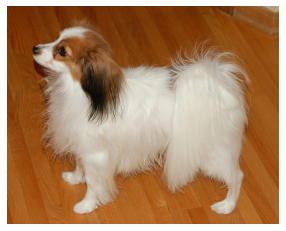

In [40]:
# Imports
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
from glob import glob
from random import shuffle
import os
%matplotlib inline

# Get random image
image_paths = glob(os.path.join(root_dir, "imagenet_samples", "*"))
shuffle(image_paths)
image_path = image_paths[0]
print("image_path  --> ",image_path)
# Load image
img = Image.open(image_path).convert("RGB")  # caricherà l'immaggine 
# Show image
plt.imshow(img)
plt.axis('off')

print("type(img)  --> ",type(img))
print("img  -->", img)


# Transform image  

input_test = inception_transform(img)

print("type(input_test)  -->", type(input_test))
print("input_test.size()  -->", input_test.size())
print("input_test  -->", input_test)

input_test = input_test.unsqueeze(0)
print("input unsquezee  ->", input_test.size())
# Compute Inception predicted label
input_test = input_test.to(dev)

#input inception ---> _conv_forward(self, input, weight, bias) ovvero [batch_size, 3, 299, 299]
pred = inception(input_test)
print("pred-->" , pred)
print("type(pred)  --> ",type(pred))
print("pred.size() -->", pred.size())
# ... add batch dimension   andiamo ad aggiunger la batch dimention 
batch_size = 8

# ... move to device
# ... compute predicted label   andiamo a calcolare la label predetta 
print(pred.size())
_,pred = pred.max(1)
print("pred",pred)
print("pred",type(pred[0]))
print("pred",pred[0].item())
# Print predicted class
print(f"Predicted: {class_names[pred[0].item()]}")

In [41]:
# Imports
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
from glob import glob
from random import shuffle
import os
%matplotlib inline
import torchvision.transforms as T

# Dog detector: returns "True" if a dog is detected in the input image
def dog_detector(pil_img):
    # Transform image
    # Define transform for Inception model
    norm_mean = (0.485, 0.456, 0.406)
    norm_std = (0.229, 0.224, 0.225)

    # Define single transforms
    resize = T.Resize(299) # This won't do anything, since images are already at that size
    random_crop = T.RandomCrop(28) # train
    random_hor_flip = T.RandomHorizontalFlip() # train
    center_crop = T.CenterCrop(299) # test
    to_tensor = T.ToTensor()
    normalize = T.Normalize(norm_mean, norm_std)

    inception_transform = T.Compose([resize, center_crop, to_tensor, normalize])

    # Compute Inception predicted label
    # Transform image  

    input_test = inception_transform(pil_img)
    #add batch dimemsion
    input_test = input_test.unsqueeze(0)

    input_test = input_test.to(dev)

    # Compute Inception predicted label
    #input inception ---> _conv_forward(self, input, weight, bias) ovvero [batch_size, 3, 299, 299]
    pred = inception(input_test)

    # ... move to device
    pred = pred.to(dev)
    print("pred.size()",pred.size())
    # ... compute predicted label   andiamo a calcolare la label predetta 
    _,pred = pred.max(1)

    # Print predicted class
    
    print("Number pf class: ", pred[0].item())
    print(f"Predicted: {class_names[pred[0].item()]}")
    # ...
    # Return
    return (pred <= 268) and (pred >= 151)

pred.size() torch.Size([1, 1000])
Number pf class:  205
Predicted: flat-coated retriever
Dogs found: tensor([True])


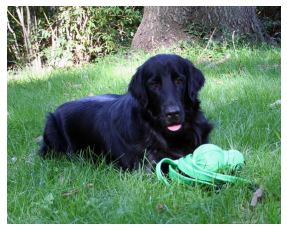

In [42]:
# Get random image from dog/image dataset
image_paths = glob(os.path.join(root_dir, "dog_vs_human", "*", "*jpg"))
shuffle(image_paths)
image_path = image_paths[0]
# Load image
img = Image.open(image_path).convert("RGB")
# Show image
plt.imshow(img)
plt.axis('off')

# Are there dogs?
dogs_found = dog_detector(img)
print(f"Dogs found: {dogs_found}")

## Step 2: Create a CNN to Classify Dog Breeds (from scratch)

In [43]:
# Imports
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
from torch.utils.data import DataLoader

# Data loading options
batch_size = 8
# dimensione dell'immaggine
load_size = 299
crop_size = 58
norm_mean = (0.5, 0.5, 0.5)  #come media e std deviation possiamo usare queste
norm_std = (0.5, 0.5, 0.5)

resize = T.Resize(299)   #***** POSSIBILE ERRORE PERCHÈ INCEPTION VUOLE IMG 299X299
random_crop = T.RandomCrop(crop_size)
random_hor_flip = T.RandomHorizontalFlip()
center_crop = T.CenterCrop(crop_size)
to_tensor = T.ToTensor()
normalize = T.Normalize(norm_mean, norm_std)
 
# Train transform
train_transform = T.Compose([ resize, random_crop, random_hor_flip, to_tensor, normalize ])

# Test transform
test_transform = T.Compose([ resize, center_crop, to_tensor, normalize])

# Instantiate datasets  POSSIBILE ERRORE È CHE ROOT_DIR SIA SBAGLIATA
dog_train_dataset = ImageFolder(os.path.join(root_dir, "dog_images", "train"), transform=train_transform)
dog_val_dataset = ImageFolder(os.path.join(root_dir, "dog_images", "valid"), transform=test_transform)
dog_test_dataset = ImageFolder(os.path.join(root_dir, "dog_images", "test"), transform=test_transform)

# Get number of classes (we'll need it in the model)
num_classes = len(dog_train_dataset.classes)

# Print dataset statistics
print(f"Num. classes: {num_classes}")
print(f"Num. train samples: {len(dog_train_dataset)}")
print(f"Num. valid. samples: {len(dog_val_dataset)}")
print(f"Num. test samples: {len(dog_test_dataset)}")


# Instantiate data loaders
train_loader = DataLoader(dog_train_dataset, batch_size, num_workers=2, shuffle=True)
val_loader = DataLoader(dog_val_dataset, batch_size, num_workers=2, shuffle=False)
test_loader = DataLoader(dog_test_dataset, batch_size, num_workers=2, shuffle=False)

Num. classes: 133
Num. train samples: 6687
Num. valid. samples: 835
Num. test samples: 836


impostando una batch_size => di 64 si riempie la cache, probabilmente lavorando sulla crop_size si potrebbe riuscire ad aumentare la batch_size anache fino a 64

CONV2D CLASS
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)[SOURCE]


in_channels (int) – Number of channels in the input image

out_channels (int) – Number of channels produced by the convolution

kernel_size (int or tuple) – Size of the convolving kernel

stride (int or tuple, optional) – Stride of the convolution. Default: 1

padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0

padding_mode (string, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1

groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1

bias (bool, optional) – If True, adds a learnable bias to the output. Default: True

Applies a 2D convolution over an input signal composed of several input planes.


The parameters kernel_size, stride, padding, dilation can either be:
a single int – in which case the same value is used for the height and width dimension

a tuple of two ints – in which case, the first int is used for the height dimension, and the second int for the width dimension

In [44]:
print(torch.__version__)


1.11.0+cu113


Ciò che fa aumentare vertiginosamente il numero di parametri e quindi l'occupazione di memoria durante l'allenamento sono i livelli lineari della rete, che dipendono dall'input così come dal numero di kernel applicati nei layer convoluzionali.

Per il tipo di task, quindi la classificazione delle razze dei cani probabilmente vi consigliere di abbassare la batch size e utilizzare una dimensione maggiore dell'immagine (maggiroe rispetto a 32x32 in riferimento alla domanda del collega) 

#### Model definition

In [45]:
# Imports
import torch.nn as nn
import torch.nn.functional as F

# Define model
class Model(nn.Module):
    
    # Constructor
    def __init__(self):
        # Call parent constructor
        super().__init__();
        # Create convolutional layers
        self.conv_layers = nn.Sequential(
            # Layer 1
            nn.Conv2d(3, 64, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            # Layer 2
            nn.Conv2d(64, 256, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            # Layer 3
            nn.Conv2d(256, 256, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Layer 4
            nn.Conv2d(256, 512, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Create fully-connected layers
        self.fc_layers = nn.Sequential(
            # FC layer
            nn.Linear(73728, 2048),
            nn.Dropout(0.5), 
            nn.ReLU(),
            # Classification layer
            nn.Linear(2048, 133) 
        )
    # Forward
    def forward(self, x):
        x = self.conv_layers(x)  # B,128, 72, 72 (then, we will want -> Bx663552)
        x = x.view(x.size(0), -1) # Bx663552
        x = self.fc_layers(x)
        return x

la dimensione di output sarà 


Out feature maps: torch.Size([1, 128, 72, 72]) => out features: 663552


la prima dimensione rappresenta la batch quindi nel nostro caso siccome vogliamo calcolare il numero di feature di output dobbiamo lasciar perdere la dimensione della batch che pythorch gestisce automaticamente e dobbiamo andare a calcolare la moltiplicazioe di d1,d2 e d3. quindi in questo caso le feature di output saranno 4096. cosa rappresentano qusti valori? 128 sono le feature map perchè 128? perchè nell'ultimo livello convoluzionale abbiamo dichiarato che avremmo 128 feature map in output, 72x72 è la dimensione spaziale che abbiamo a seguito del fatto che non abbiamo applicato padding e abbiamo applicato 2 max pool.

Quindi a questo punto una volta conosciute quali sono le feature di output del nostro modello possiamo andare a definire la nostra CNN quindi possiamo andare ad aggiungere i nostri livelli fully connected alla fine dei livelli convoluzionali.

Il numero di feature di input sarà il numero di feature che abbiamo calcolato essere in output ai livelli convoluzionali quindi 663552 decidiamo di passare da 663552 a 2048. e per i layer di uscita da 2048 a 1000 perchè 1000 sono le classi.

il foreward in questo caso sarà dato da conv layer, successivamente per dare in input l'output dei livelli convoluzionali ai fully connected layer. dobbiamo andare a vettorizzare le feature map prchè all'uscita abbiamo visto che abbiamo un tensore di dimensione Bx128x72x72 quindi dobbiamo andare ad applicare il view per avere un tensore di bx663552.

il vettore linearizzato lo andiamo a passare ai fully connected layer

In [46]:
#create model
model = Model()

In [47]:
# Test model output
model.eval()
test_input = dog_train_dataset[0][0].unsqueeze(0)
print("model  -->  ", model)
print("test_input -->", test_input)
print("test_input -->", test_input.size())
print("Model output size:", model(test_input).size())
#print(f"Out feature maps: {model(test_input).size()} => out features: {model(test_input).size()[1]*model(test_input).size()[2]*model(test_input).size()[3]}")

model  -->   Model(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=73728, out_features=2048, bias=True)
    (1): Dropout(p=0

In [48]:
# Move model to device
# Select device
print(f"CUDA is available? {torch.cuda.is_available()}")
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(dev)

model = model.to(dev)

CUDA is available? False
cpu


In [49]:
# Import
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Create optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)  #, momentum=0.9)
#optimizer = optim.Adam([var1, var2], lr=0.0001)

In [50]:
# Initialize training history
# HINT: here you set up the lists for average loss/accuracy for all epochs
# ...
# Initialize best validation accuracy and test accuracy at best validation accuracy
from numpy import e

loaders = {"train": train_loader, "val": val_loader, "test": test_loader }

best_val_accuracy = 0
test_accuracy_at_best_val = 0
epoch_at_best_val_accuracy = 0
min_val_loss = 0

history_loss = {"train": [], "val": [], "test": []}
history_accuracy = {"train": [], "val": [], "test": []}



print(type(history_accuracy))
print(train_loader)
print(test_loader )
i = iter(test_loader)
print(i)
print(next(i) )






<class 'dict'>
[tensor([[[[-0.6863, -0.7255, -0.6706,  ..., -0.4353, -0.5608, -0.7020],
          [-0.6000, -0.6471, -0.6863,  ..., -0.5373, -0.5608, -0.6235],
          [-0.4510, -0.5922, -0.7412,  ..., -0.6235, -0.7098, -0.6000],
          ...,
          [-0.9059, -0.8902, -0.8667,  ..., -0.8667, -0.8824, -0.8980],
          [-0.9216, -0.9294, -0.8824,  ..., -0.8353, -0.8588, -0.8667],
          [-0.8980, -0.9059, -0.8980,  ..., -0.8275, -0.8431, -0.8431]],

         [[-0.7804, -0.8196, -0.7647,  ..., -0.5608, -0.6863, -0.8353],
          [-0.6941, -0.7333, -0.7804,  ..., -0.6549, -0.6784, -0.7490],
          [-0.5373, -0.6784, -0.8353,  ..., -0.7412, -0.8275, -0.7098],
          ...,
          [-0.9529, -0.9373, -0.9137,  ..., -0.9373, -0.9451, -0.9373],
          [-0.9686, -0.9765, -0.9294,  ..., -0.9137, -0.9294, -0.9294],
          [-0.9451, -0.9529, -0.9451,  ..., -0.9137, -0.9216, -0.9216]],

         [[-0.7804, -0.8196, -0.7647,  ..., -0.5373, -0.6627, -0.7882],
          [-0.

at each epoch, compute average training loss, training accuracy, validation loss, validation accuracy, test loss, test accuracy;
keep a list for each of the above values for all epochs (for plotting);
keep track of the test accuracy at the best validation accuracy.

In [ ]:
import time
# Start training
# HINT:
# - change the number of epochs as you want
# - you can always interrupt training by clicking on the "interrupt kernel" on the toolbar
# - you can set a small number of epochs, train for a while, plot losses, and then train again
# - in general, training for at most 50 epochs will be ok
# Compute forward time

try:
  for epoch in range(50):
    #print("\n\n epoch :  ", epoch ,"\n")
    # Initialize variables for computing average loss/accuracy
    sum_loss = {"train": 0, "val": 0, "test": 0}
    sum_accuracy = {"train": 0, "val": 0, "test": 0}
    # Process each split
    for split in ["train", "val", "test"]:
        # Set network mode (train or eval)
        if split == 'train':
          model.train()
        else: model.eval()
        # Process all data in split
        for i,(input,labels) in enumerate(loaders[split]):
            # Read data
            print("\nSplit: --> ", split, "  Index --> ", i ,"  Epoch --> ",epoch )
            # Move to CUDA
            input = input.to(dev)
            labels = labels.to(dev)
            
            # Compute loss
            start_time = time.time()
            optimizer.zero_grad()
            pred = model(input)
            loss = F.cross_entropy(pred, labels)
            end_time = time.time()
            forward_time = end_time - start_time
            #print(f"Forward time: {forward_time:.4f} seconds")

            # Update variables for average epoch loss
            sum_loss[split] += loss.item()
            # Compute accuracy
            _,pred_labels = pred.max(1) #prende la predizione con la massima probabilità ovvero quella del neurone che si è attivato di più
            batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
            # Update variables for average epoch accuracy
            sum_accuracy[split] += batch_accuracy
            #print("(pred_labels == labels).sum().item()", (pred_labels == labels).sum().item(), "  input.size(0) ", input.size(0))
            #print(" loss:  ", loss.item() ,"   batch_accuracy:  ", batch_accuracy,  "pred_labels ", pred_labels, "  labels :", labels)
            # Backward and optimize
            if split == "train":
              #compute gradients
              start_time = time.time()
              loss.backward()
              end_time = time.time()
              backward_time = end_time - start_time
              #print(f"Backward time: {backward_time:.5f} seconds")
              #optimize
              optimizer.step()
    # Compute average epoch loss/accuracy
    epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}      
    epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}  
    # Append average values to history lists
    for split in ["train", "val", "test"]:
      history_loss[split].append(epoch_loss[split])
      history_accuracy[split].append(epoch_accuracy[split])
    
    print("epoch_accuracy[val] -->  ", epoch_accuracy["val"])
    print("best_val_accuracy", best_val_accuracy)

    # Check if we obtained the best validation accuracy
    if epoch_accuracy["val"] > best_val_accuracy:
      # Update best validation accuracy and test accuracy at best validation
      best_val_accuracy = epoch_accuracy["val"]
      test_accuracy_at_best_val = epoch_accuracy["test"]
      epoch_at_best_val_accuracy = epoch
      min_val_loss = epoch_loss["val"]
      print("test_accuracy_at_best_val   -->  ", test_accuracy_at_best_val)

    # Print info
    print(f"\n\n\n Epoch {epoch+1}:",
          f"TrL={epoch_loss['train']:.4f},",
          f"TrA={epoch_accuracy['train']:.4f},",
          f"VL={epoch_loss['val']:.4f},",
          f"VA={epoch_accuracy['val']:.4f},",
          f"TeL={epoch_loss['test']:.4f},",
          f"TeA={epoch_accuracy['test']:.4f},")
    print("\n")
    print("test_accuracy_at_best_val   -->  ", test_accuracy_at_best_val, 
          "  best_val_accuracy --> ", best_val_accuracy, 
          "  epoch_at_best_val_accuracy -->", epoch_at_best_val_accuracy,
          "  min_val_loss --> ", min_val_loss )

except KeyboardInterrupt:
  print("Interrupted")

finally:
    print("\n")
    print("test_accuracy_at_best_val   -->  ", test_accuracy_at_best_val, 
          "  best_val_accuracy --> ", best_val_accuracy, 
          "  epoch_at_best_val_accuracy -->", epoch_at_best_val_accuracy,
          "  min_val_loss --> ", min_val_loss )

    # Plot loss
    print("\n\n\n" )
    plt.title("Loss")
    for split in ["train", "val", "test"]:
        plt.plot(history_loss[split], label=split)
    plt.legend()
    plt.show()
    # Plot accuracy
    plt.title("Accuracy")
    for split in ["train", "val", "test"]:
        plt.plot(history_accuracy[split], label=split)
    plt.legend()
    plt.show()



Split: -->  train   Index -->  0   Epoch -->  0

Split: -->  train   Index -->  1   Epoch -->  0

Split: -->  train   Index -->  2   Epoch -->  0

Split: -->  train   Index -->  3   Epoch -->  0

Split: -->  train   Index -->  4   Epoch -->  0

Split: -->  train   Index -->  5   Epoch -->  0

Split: -->  train   Index -->  6   Epoch -->  0

Split: -->  train   Index -->  7   Epoch -->  0

Split: -->  train   Index -->  8   Epoch -->  0

Split: -->  train   Index -->  9   Epoch -->  0

Split: -->  train   Index -->  10   Epoch -->  0

Split: -->  train   Index -->  11   Epoch -->  0

Split: -->  train   Index -->  12   Epoch -->  0

Split: -->  train   Index -->  13   Epoch -->  0

Split: -->  train   Index -->  14   Epoch -->  0

Split: -->  train   Index -->  15   Epoch -->  0

Split: -->  train   Index -->  16   Epoch -->  0

Split: -->  train   Index -->  17   Epoch -->  0

Split: -->  train   Index -->  18   Epoch -->  0

Split: -->  train   Index -->  19   Epoch -->  0

Split: --

In [ ]:
print("\n")
print("test_accuracy_at_best_val   -->  ", test_accuracy_at_best_val, 
      "  best_val_accuracy --> ", best_val_accuracy, 
      "  epoch_at_best_val_accuracy -->", epoch_at_best_val_accuracy,
      "  min_val_loss --> ", min_val_loss )


In [ ]:
for epoch in range(50):
  for split in ["train", "val", "test"]:
    print(" in  :", split ," at epoch  :", epoch , " loss  ", history_loss[split] , " and accuracy  ", history_accuracy[split])

In [ ]:
# Print test accuracy at best validation accuracy
print(f"Final test accuracy {test_accuracy_at_best_val:.4f}")

In [ ]:
# Plot loss history
plt.title("Loss")
for split in ["train", "val", "test"]:
    plt.plot(history_loss[split], label=split)
plt.legend()
plt.show()

In [ ]:
# Plot accuracy history
plt.title("Accuracy")
for split in ["train", "val", "test"]:
    plt.plot(history_accuracy[split], label=split)
plt.legend()
plt.show()

##Risultato dopo  50 epoche 

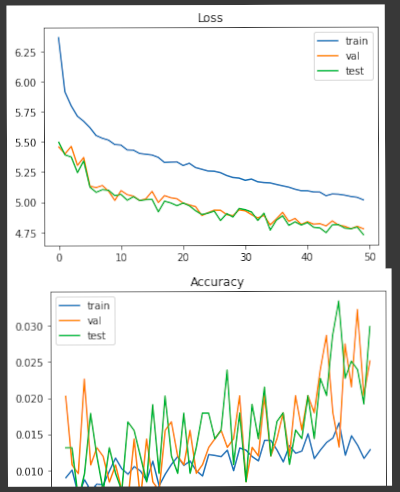

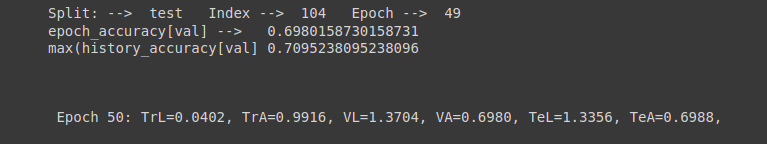

In [ ]:
import random

# Get random sample from test set
idx = random.randint(0, len(dog_test_dataset)-1)
input, label = dog_test_dataset[idx]
# Normalize and show image
input_show = (input - input.min())/(input.max() - input.min())
plt.imshow(input_show.permute(1,2,0).numpy())
plt.axis('off')
# Predict class
model.eval()
with torch.no_grad():
    output = model(input.unsqueeze(0).to(dev))
_,pred = output.max(1)
pred = pred.item()
print(f"Predicted: {pred} (correct: {label})")

## Step 3: Fine-tune a CNN

In [6]:
# Imports
import torch.nn as nn
import torch.nn.functional as F

# Define fine-tuned model
class FineTunedAlexNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Load AlexNet model
        alexnet = models.alexnet(pretrained=True)
        # Select feature extraction part
        self.features = alexnet.features
        # Add layers
        
        # Create fully-connected layers
        self.fc_layers = nn.Sequential(
            # FC layer
            nn.Linear(12544, 4096),
            nn.Dropout(0.5), 
            nn.ReLU(),
            # Classification layer
            nn.Linear(4096, 133) 
        )
        
    
    def forward(self, x):
        # Go through the pre-trained layers
        x = self.features(x)   #Out feature maps: torch.Size([1, 256, 7, 7]) => out features: 12544
        x = x.view(x.size(0), -1) # B, 256, 7, 7 (then, we will want -> Bx12544)   --> Bx12544
        x = self.fc_layers(x)
        return x
        # Go through added layers
        # HINT: check the output of the model without adding any layer to see the size of the feature maps from AlexNet
        # ...

In [7]:
# Imports
import torchvision.models as models
# Create model
model = FineTunedAlexNet()

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [8]:
# Define root directory from Google Drive
from google.colab import drive
drive.mount("/content/drive/")
root_dir = "/content/drive/My Drive/dog_classification_data/"

Mounted at /content/drive/


##classmap

In [9]:
# ImageNet class map
class_names = {0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mud puppy, Ambystoma mexicanum', 30: 'bullfrog, Rana catesbeiana', 31: 'tree frog, tree-frog', 32: 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui', 33: 'loggerhead, loggerhead turtle, Caretta caretta', 34: 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea', 35: 'mud turtle', 36: 'terrapin', 37: 'box turtle, box tortoise', 38: 'banded gecko', 39: 'common iguana, iguana, Iguana iguana', 40: 'American chameleon, anole, Anolis carolinensis', 41: 'whiptail, whiptail lizard', 42: 'agama', 43: 'frilled lizard, Chlamydosaurus kingi', 44: 'alligator lizard', 45: 'Gila monster, Heloderma suspectum', 46: 'green lizard, Lacerta viridis', 47: 'African chameleon, Chamaeleo chamaeleon', 48: 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis', 49: 'African crocodile, Nile crocodile, Crocodylus niloticus', 50: 'American alligator, Alligator mississipiensis', 51: 'triceratops', 52: 'thunder snake, worm snake, Carphophis amoenus', 53: 'ringneck snake, ring-necked snake, ring snake', 54: 'hognose snake, puff adder, sand viper', 55: 'green snake, grass snake', 56: 'king snake, kingsnake', 57: 'garter snake, grass snake', 58: 'water snake', 59: 'vine snake', 60: 'night snake, Hypsiglena torquata', 61: 'boa constrictor, Constrictor constrictor', 62: 'rock python, rock snake, Python sebae', 63: 'Indian cobra, Naja naja', 64: 'green mamba', 65: 'sea snake', 66: 'horned viper, cerastes, sand viper, horned asp, Cerastes cornutus', 67: 'diamondback, diamondback rattlesnake, Crotalus adamanteus', 68: 'sidewinder, horned rattlesnake, Crotalus cerastes', 69: 'trilobite', 70: 'harvestman, daddy longlegs, Phalangium opilio', 71: 'scorpion', 72: 'black and gold garden spider, Argiope aurantia', 73: 'barn spider, Araneus cavaticus', 74: 'garden spider, Aranea diademata', 75: 'black widow, Latrodectus mactans', 76: 'tarantula', 77: 'wolf spider, hunting spider', 78: 'tick', 79: 'centipede', 80: 'black grouse', 81: 'ptarmigan', 82: 'ruffed grouse, partridge, Bonasa umbellus', 83: 'prairie chicken, prairie grouse, prairie fowl', 84: 'peacock', 85: 'quail', 86: 'partridge', 87: 'African grey, African gray, Psittacus erithacus', 88: 'macaw', 89: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 90: 'lorikeet', 91: 'coucal', 92: 'bee eater', 93: 'hornbill', 94: 'hummingbird', 95: 'jacamar', 96: 'toucan', 97: 'drake', 98: 'red-breasted merganser, Mergus serrator', 99: 'goose', 100: 'black swan, Cygnus atratus', 101: 'tusker', 102: 'echidna, spiny anteater, anteater', 103: 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus', 104: 'wallaby, brush kangaroo', 105: 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus', 106: 'wombat', 107: 'jellyfish', 108: 'sea anemone, anemone', 109: 'brain coral', 110: 'flatworm, platyhelminth', 111: 'nematode, nematode worm, roundworm', 112: 'conch', 113: 'snail', 114: 'slug', 115: 'sea slug, nudibranch', 116: 'chiton, coat-of-mail shell, sea cradle, polyplacophore', 117: 'chambered nautilus, pearly nautilus, nautilus', 118: 'Dungeness crab, Cancer magister', 119: 'rock crab, Cancer irroratus', 120: 'fiddler crab', 121: 'king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica', 122: 'American lobster, Northern lobster, Maine lobster, Homarus americanus', 123: 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish', 124: 'crayfish, crawfish, crawdad, crawdaddy', 125: 'hermit crab', 126: 'isopod', 127: 'white stork, Ciconia ciconia', 128: 'black stork, Ciconia nigra', 129: 'spoonbill', 130: 'flamingo', 131: 'little blue heron, Egretta caerulea', 132: 'American egret, great white heron, Egretta albus', 133: 'bittern', 134: 'crane', 135: 'limpkin, Aramus pictus', 136: 'European gallinule, Porphyrio porphyrio', 137: 'American coot, marsh hen, mud hen, water hen, Fulica americana', 138: 'bustard', 139: 'ruddy turnstone, Arenaria interpres', 140: 'red-backed sandpiper, dunlin, Erolia alpina', 141: 'redshank, Tringa totanus', 142: 'dowitcher', 143: 'oystercatcher, oyster catcher', 144: 'pelican', 145: 'king penguin, Aptenodytes patagonica', 146: 'albatross, mollymawk', 147: 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus', 148: 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca', 149: 'dugong, Dugong dugon', 150: 'sea lion', 151: 'Chihuahua', 152: 'Japanese spaniel', 153: 'Maltese dog, Maltese terrier, Maltese', 154: 'Pekinese, Pekingese, Peke', 155: 'Shih-Tzu', 156: 'Blenheim spaniel', 157: 'papillon', 158: 'toy terrier', 159: 'Rhodesian ridgeback', 160: 'Afghan hound, Afghan', 161: 'basset, basset hound', 162: 'beagle', 163: 'bloodhound, sleuthhound', 164: 'bluetick', 165: 'black-and-tan coonhound', 166: 'Walker hound, Walker foxhound', 167: 'English foxhound', 168: 'redbone', 169: 'borzoi, Russian wolfhound', 170: 'Irish wolfhound', 171: 'Italian greyhound', 172: 'whippet', 173: 'Ibizan hound, Ibizan Podenco', 174: 'Norwegian elkhound, elkhound', 175: 'otterhound, otter hound', 176: 'Saluki, gazelle hound', 177: 'Scottish deerhound, deerhound', 178: 'Weimaraner', 179: 'Staffordshire bullterrier, Staffordshire bull terrier', 180: 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', 181: 'Bedlington terrier', 182: 'Border terrier', 183: 'Kerry blue terrier', 184: 'Irish terrier', 185: 'Norfolk terrier', 186: 'Norwich terrier', 187: 'Yorkshire terrier', 188: 'wire-haired fox terrier', 189: 'Lakeland terrier', 190: 'Sealyham terrier, Sealyham', 191: 'Airedale, Airedale terrier', 192: 'cairn, cairn terrier', 193: 'Australian terrier', 194: 'Dandie Dinmont, Dandie Dinmont terrier', 195: 'Boston bull, Boston terrier', 196: 'miniature schnauzer', 197: 'giant schnauzer', 198: 'standard schnauzer', 199: 'Scotch terrier, Scottish terrier, Scottie', 200: 'Tibetan terrier, chrysanthemum dog', 201: 'silky terrier, Sydney silky', 202: 'soft-coated wheaten terrier', 203: 'West Highland white terrier', 204: 'Lhasa, Lhasa apso', 205: 'flat-coated retriever', 206: 'curly-coated retriever', 207: 'golden retriever', 208: 'Labrador retriever', 209: 'Chesapeake Bay retriever', 210: 'German short-haired pointer', 211: 'vizsla, Hungarian pointer', 212: 'English setter', 213: 'Irish setter, red setter', 214: 'Gordon setter', 215: 'Brittany spaniel', 216: 'clumber, clumber spaniel', 217: 'English springer, English springer spaniel', 218: 'Welsh springer spaniel', 219: 'cocker spaniel, English cocker spaniel, cocker', 220: 'Sussex spaniel', 221: 'Irish water spaniel', 222: 'kuvasz', 223: 'schipperke', 224: 'groenendael', 225: 'malinois', 226: 'briard', 227: 'kelpie', 228: 'komondor', 229: 'Old English sheepdog, bobtail', 230: 'Shetland sheepdog, Shetland sheep dog, Shetland', 231: 'collie', 232: 'Border collie', 233: 'Bouvier des Flandres, Bouviers des Flandres', 234: 'Rottweiler', 235: 'German shepherd, German shepherd dog, German police dog, alsatian', 236: 'Doberman, Doberman pinscher', 237: 'miniature pinscher', 238: 'Greater Swiss Mountain dog', 239: 'Bernese mountain dog', 240: 'Appenzeller', 241: 'EntleBucher', 242: 'boxer', 243: 'bull mastiff', 244: 'Tibetan mastiff', 245: 'French bulldog', 246: 'Great Dane', 247: 'Saint Bernard, St Bernard', 248: 'Eskimo dog, husky', 249: 'malamute, malemute, Alaskan malamute', 250: 'Siberian husky', 251: 'dalmatian, coach dog, carriage dog', 252: 'affenpinscher, monkey pinscher, monkey dog', 253: 'basenji', 254: 'pug, pug-dog', 255: 'Leonberg', 256: 'Newfoundland, Newfoundland dog', 257: 'Great Pyrenees', 258: 'Samoyed, Samoyede', 259: 'Pomeranian', 260: 'chow, chow chow', 261: 'keeshond', 262: 'Brabancon griffon', 263: 'Pembroke, Pembroke Welsh corgi', 264: 'Cardigan, Cardigan Welsh corgi', 265: 'toy poodle', 266: 'miniature poodle', 267: 'standard poodle', 268: 'Mexican hairless', 269: 'timber wolf, grey wolf, gray wolf, Canis lupus', 270: 'white wolf, Arctic wolf, Canis lupus tundrarum', 271: 'red wolf, maned wolf, Canis rufus, Canis niger', 272: 'coyote, prairie wolf, brush wolf, Canis latrans', 273: 'dingo, warrigal, warragal, Canis dingo', 274: 'dhole, Cuon alpinus', 275: 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus', 276: 'hyena, hyaena', 277: 'red fox, Vulpes vulpes', 278: 'kit fox, Vulpes macrotis', 279: 'Arctic fox, white fox, Alopex lagopus', 280: 'grey fox, gray fox, Urocyon cinereoargenteus', 281: 'tabby, tabby cat', 282: 'tiger cat', 283: 'Persian cat', 284: 'Siamese cat, Siamese', 285: 'Egyptian cat', 286: 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 287: 'lynx, catamount', 288: 'leopard, Panthera pardus', 289: 'snow leopard, ounce, Panthera uncia', 290: 'jaguar, panther, Panthera onca, Felis onca', 291: 'lion, king of beasts, Panthera leo', 292: 'tiger, Panthera tigris', 293: 'cheetah, chetah, Acinonyx jubatus', 294: 'brown bear, bruin, Ursus arctos', 295: 'American black bear, black bear, Ursus americanus, Euarctos americanus', 296: 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus', 297: 'sloth bear, Melursus ursinus, Ursus ursinus', 298: 'mongoose', 299: 'meerkat, mierkat', 300: 'tiger beetle', 301: 'ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle', 302: 'ground beetle, carabid beetle', 303: 'long-horned beetle, longicorn, longicorn beetle', 304: 'leaf beetle, chrysomelid', 305: 'dung beetle', 306: 'rhinoceros beetle', 307: 'weevil', 308: 'fly', 309: 'bee', 310: 'ant, emmet, pismire', 311: 'grasshopper, hopper', 312: 'cricket', 313: 'walking stick, walkingstick, stick insect', 314: 'cockroach, roach', 315: 'mantis, mantid', 316: 'cicada, cicala', 317: 'leafhopper', 318: 'lacewing, lacewing fly', 319: "dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk", 320: 'damselfly', 321: 'admiral', 322: 'ringlet, ringlet butterfly', 323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus', 324: 'cabbage butterfly', 325: 'sulphur butterfly, sulfur butterfly', 326: 'lycaenid, lycaenid butterfly', 327: 'starfish, sea star', 328: 'sea urchin', 329: 'sea cucumber, holothurian', 330: 'wood rabbit, cottontail, cottontail rabbit', 331: 'hare', 332: 'Angora, Angora rabbit', 333: 'hamster', 334: 'porcupine, hedgehog', 335: 'fox squirrel, eastern fox squirrel, Sciurus niger', 336: 'marmot', 337: 'beaver', 338: 'guinea pig, Cavia cobaya', 339: 'sorrel', 340: 'zebra', 341: 'hog, pig, grunter, squealer, Sus scrofa', 342: 'wild boar, boar, Sus scrofa', 343: 'warthog', 344: 'hippopotamus, hippo, river horse, Hippopotamus amphibius', 345: 'ox', 346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis', 347: 'bison', 348: 'ram, tup', 349: 'bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis', 350: 'ibex, Capra ibex', 351: 'hartebeest', 352: 'impala, Aepyceros melampus', 353: 'gazelle', 354: 'Arabian camel, dromedary, Camelus dromedarius', 355: 'llama', 356: 'weasel', 357: 'mink', 358: 'polecat, fitch, foulmart, foumart, Mustela putorius', 359: 'black-footed ferret, ferret, Mustela nigripes', 360: 'otter', 361: 'skunk, polecat, wood pussy', 362: 'badger', 363: 'armadillo', 364: 'three-toed sloth, ai, Bradypus tridactylus', 365: 'orangutan, orang, orangutang, Pongo pygmaeus', 366: 'gorilla, Gorilla gorilla', 367: 'chimpanzee, chimp, Pan troglodytes', 368: 'gibbon, Hylobates lar', 369: 'siamang, Hylobates syndactylus, Symphalangus syndactylus', 370: 'guenon, guenon monkey', 371: 'patas, hussar monkey, Erythrocebus patas', 372: 'baboon', 373: 'macaque', 374: 'langur', 375: 'colobus, colobus monkey', 376: 'proboscis monkey, Nasalis larvatus', 377: 'marmoset', 378: 'capuchin, ringtail, Cebus capucinus', 379: 'howler monkey, howler', 380: 'titi, titi monkey', 381: 'spider monkey, Ateles geoffroyi', 382: 'squirrel monkey, Saimiri sciureus', 383: 'Madagascar cat, ring-tailed lemur, Lemur catta', 384: 'indri, indris, Indri indri, Indri brevicaudatus', 385: 'Indian elephant, Elephas maximus', 386: 'African elephant, Loxodonta africana', 387: 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens', 388: 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 389: 'barracouta, snoek', 390: 'eel', 391: 'coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch', 392: 'rock beauty, Holocanthus tricolor', 393: 'anemone fish', 394: 'sturgeon', 395: 'gar, garfish, garpike, billfish, Lepisosteus osseus', 396: 'lionfish', 397: 'puffer, pufferfish, blowfish, globefish', 398: 'abacus', 399: 'abaya', 400: "academic gown, academic robe, judge's robe", 401: 'accordion, piano accordion, squeeze box', 402: 'acoustic guitar', 403: 'aircraft carrier, carrier, flattop, attack aircraft carrier', 404: 'airliner', 405: 'airship, dirigible', 406: 'altar', 407: 'ambulance', 408: 'amphibian, amphibious vehicle', 409: 'analog clock', 410: 'apiary, bee house', 411: 'apron', 412: 'ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin', 413: 'assault rifle, assault gun', 414: 'backpack, back pack, knapsack, packsack, rucksack, haversack', 415: 'bakery, bakeshop, bakehouse', 416: 'balance beam, beam', 417: 'balloon', 418: 'ballpoint, ballpoint pen, ballpen, Biro', 419: 'Band Aid', 420: 'banjo', 421: 'bannister, banister, balustrade, balusters, handrail', 422: 'barbell', 423: 'barber chair', 424: 'barbershop', 425: 'barn', 426: 'barometer', 427: 'barrel, cask', 428: 'barrow, garden cart, lawn cart, wheelbarrow', 429: 'baseball', 430: 'basketball', 431: 'bassinet', 432: 'bassoon', 433: 'bathing cap, swimming cap', 434: 'bath towel', 435: 'bathtub, bathing tub, bath, tub', 436: 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon', 437: 'beacon, lighthouse, beacon light, pharos', 438: 'beaker', 439: 'bearskin, busby, shako', 440: 'beer bottle', 441: 'beer glass', 442: 'bell cote, bell cot', 443: 'bib', 444: 'bicycle-built-for-two, tandem bicycle, tandem', 445: 'bikini, two-piece', 446: 'binder, ring-binder', 447: 'binoculars, field glasses, opera glasses', 448: 'birdhouse', 449: 'boathouse', 450: 'bobsled, bobsleigh, bob', 451: 'bolo tie, bolo, bola tie, bola', 452: 'bonnet, poke bonnet', 453: 'bookcase', 454: 'bookshop, bookstore, bookstall', 455: 'bottlecap', 456: 'bow', 457: 'bow tie, bow-tie, bowtie', 458: 'brass, memorial tablet, plaque', 459: 'brassiere, bra, bandeau', 460: 'breakwater, groin, groyne, mole, bulwark, seawall, jetty', 461: 'breastplate, aegis, egis', 462: 'broom', 463: 'bucket, pail', 464: 'buckle', 465: 'bulletproof vest', 466: 'bullet train, bullet', 467: 'butcher shop, meat market', 468: 'cab, hack, taxi, taxicab', 469: 'caldron, cauldron', 470: 'candle, taper, wax light', 471: 'cannon', 472: 'canoe', 473: 'can opener, tin opener', 474: 'cardigan', 475: 'car mirror', 476: 'carousel, carrousel, merry-go-round, roundabout, whirligig', 477: "carpenter's kit, tool kit", 478: 'carton', 479: 'car wheel', 480: 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM', 481: 'cassette', 482: 'cassette player', 483: 'castle', 484: 'catamaran', 485: 'CD player', 486: 'cello, violoncello', 487: 'cellular telephone, cellular phone, cellphone, cell, mobile phone', 488: 'chain', 489: 'chainlink fence', 490: 'chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour', 491: 'chain saw, chainsaw', 492: 'chest', 493: 'chiffonier, commode', 494: 'chime, bell, gong', 495: 'china cabinet, china closet', 496: 'Christmas stocking', 497: 'church, church building', 498: 'cinema, movie theater, movie theatre, movie house, picture palace', 499: 'cleaver, meat cleaver, chopper', 500: 'cliff dwelling', 501: 'cloak', 502: 'clog, geta, patten, sabot', 503: 'cocktail shaker', 504: 'coffee mug', 505: 'coffeepot', 506: 'coil, spiral, volute, whorl, helix', 507: 'combination lock', 508: 'computer keyboard, keypad', 509: 'confectionery, confectionary, candy store', 510: 'container ship, containership, container vessel', 511: 'convertible', 512: 'corkscrew, bottle screw', 513: 'cornet, horn, trumpet, trump', 514: 'cowboy boot', 515: 'cowboy hat, ten-gallon hat', 516: 'cradle', 517: 'crane', 518: 'crash helmet', 519: 'crate', 520: 'crib, cot', 521: 'Crock Pot', 522: 'croquet ball', 523: 'crutch', 524: 'cuirass', 525: 'dam, dike, dyke', 526: 'desk', 527: 'desktop computer', 528: 'dial telephone, dial phone', 529: 'diaper, nappy, napkin', 530: 'digital clock', 531: 'digital watch', 532: 'dining table, board', 533: 'dishrag, dishcloth', 534: 'dishwasher, dish washer, dishwashing machine', 535: 'disk brake, disc brake', 536: 'dock, dockage, docking facility', 537: 'dogsled, dog sled, dog sleigh', 538: 'dome', 539: 'doormat, welcome mat', 540: 'drilling platform, offshore rig', 541: 'drum, membranophone, tympan', 542: 'drumstick', 543: 'dumbbell', 544: 'Dutch oven', 545: 'electric fan, blower', 546: 'electric guitar', 547: 'electric locomotive', 548: 'entertainment center', 549: 'envelope', 550: 'espresso maker', 551: 'face powder', 552: 'feather boa, boa', 553: 'file, file cabinet, filing cabinet', 554: 'fireboat', 555: 'fire engine, fire truck', 556: 'fire screen, fireguard', 557: 'flagpole, flagstaff', 558: 'flute, transverse flute', 559: 'folding chair', 560: 'football helmet', 561: 'forklift', 562: 'fountain', 563: 'fountain pen', 564: 'four-poster', 565: 'freight car', 566: 'French horn, horn', 567: 'frying pan, frypan, skillet', 568: 'fur coat', 569: 'garbage truck, dustcart', 570: 'gasmask, respirator, gas helmet', 571: 'gas pump, gasoline pump, petrol pump, island dispenser', 572: 'goblet', 573: 'go-kart', 574: 'golf ball', 575: 'golfcart, golf cart', 576: 'gondola', 577: 'gong, tam-tam', 578: 'gown', 579: 'grand piano, grand', 580: 'greenhouse, nursery, glasshouse', 581: 'grille, radiator grille', 582: 'grocery store, grocery, food market, market', 583: 'guillotine', 584: 'hair slide', 585: 'hair spray', 586: 'half track', 587: 'hammer', 588: 'hamper', 589: 'hand blower, blow dryer, blow drier, hair dryer, hair drier', 590: 'hand-held computer, hand-held microcomputer', 591: 'handkerchief, hankie, hanky, hankey', 592: 'hard disc, hard disk, fixed disk', 593: 'harmonica, mouth organ, harp, mouth harp', 594: 'harp', 595: 'harvester, reaper', 596: 'hatchet', 597: 'holster', 598: 'home theater, home theatre', 599: 'honeycomb', 600: 'hook, claw', 601: 'hoopskirt, crinoline', 602: 'horizontal bar, high bar', 603: 'horse cart, horse-cart', 604: 'hourglass', 605: 'iPod', 606: 'iron, smoothing iron', 607: "jack-o'-lantern", 608: 'jean, blue jean, denim', 609: 'jeep, landrover', 610: 'jersey, T-shirt, tee shirt', 611: 'jigsaw puzzle', 612: 'jinrikisha, ricksha, rickshaw', 613: 'joystick', 614: 'kimono', 615: 'knee pad', 616: 'knot', 617: 'lab coat, laboratory coat', 618: 'ladle', 619: 'lampshade, lamp shade', 620: 'laptop, laptop computer', 621: 'lawn mower, mower', 622: 'lens cap, lens cover', 623: 'letter opener, paper knife, paperknife', 624: 'library', 625: 'lifeboat', 626: 'lighter, light, igniter, ignitor', 627: 'limousine, limo', 628: 'liner, ocean liner', 629: 'lipstick, lip rouge', 630: 'Loafer', 631: 'lotion', 632: 'loudspeaker, speaker, speaker unit, loudspeaker system, speaker system', 633: "loupe, jeweler's loupe", 634: 'lumbermill, sawmill', 635: 'magnetic compass', 636: 'mailbag, postbag', 637: 'mailbox, letter box', 638: 'maillot', 639: 'maillot, tank suit', 640: 'manhole cover', 641: 'maraca', 642: 'marimba, xylophone', 643: 'mask', 644: 'matchstick', 645: 'maypole', 646: 'maze, labyrinth', 647: 'measuring cup', 648: 'medicine chest, medicine cabinet', 649: 'megalith, megalithic structure', 650: 'microphone, mike', 651: 'microwave, microwave oven', 652: 'military uniform', 653: 'milk can', 654: 'minibus', 655: 'miniskirt, mini', 656: 'minivan', 657: 'missile', 658: 'mitten', 659: 'mixing bowl', 660: 'mobile home, manufactured home', 661: 'Model T', 662: 'modem', 663: 'monastery', 664: 'monitor', 665: 'moped', 666: 'mortar', 667: 'mortarboard', 668: 'mosque', 669: 'mosquito net', 670: 'motor scooter, scooter', 671: 'mountain bike, all-terrain bike, off-roader', 672: 'mountain tent', 673: 'mouse, computer mouse', 674: 'mousetrap', 675: 'moving van', 676: 'muzzle', 677: 'nail', 678: 'neck brace', 679: 'necklace', 680: 'nipple', 681: 'notebook, notebook computer', 682: 'obelisk', 683: 'oboe, hautboy, hautbois', 684: 'ocarina, sweet potato', 685: 'odometer, hodometer, mileometer, milometer', 686: 'oil filter', 687: 'organ, pipe organ', 688: 'oscilloscope, scope, cathode-ray oscilloscope, CRO', 689: 'overskirt', 690: 'oxcart', 691: 'oxygen mask', 692: 'packet', 693: 'paddle, boat paddle', 694: 'paddlewheel, paddle wheel', 695: 'padlock', 696: 'paintbrush', 697: "pajama, pyjama, pj's, jammies", 698: 'palace', 699: 'panpipe, pandean pipe, syrinx', 700: 'paper towel', 701: 'parachute, chute', 702: 'parallel bars, bars', 703: 'park bench', 704: 'parking meter', 705: 'passenger car, coach, carriage', 706: 'patio, terrace', 707: 'pay-phone, pay-station', 708: 'pedestal, plinth, footstall', 709: 'pencil box, pencil case', 710: 'pencil sharpener', 711: 'perfume, essence', 712: 'Petri dish', 713: 'photocopier', 714: 'pick, plectrum, plectron', 715: 'pickelhaube', 716: 'picket fence, paling', 717: 'pickup, pickup truck', 718: 'pier', 719: 'piggy bank, penny bank', 720: 'pill bottle', 721: 'pillow', 722: 'ping-pong ball', 723: 'pinwheel', 724: 'pirate, pirate ship', 725: 'pitcher, ewer', 726: "plane, carpenter's plane, woodworking plane", 727: 'planetarium', 728: 'plastic bag', 729: 'plate rack', 730: 'plow, plough', 731: "plunger, plumber's helper", 732: 'Polaroid camera, Polaroid Land camera', 733: 'pole', 734: 'police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria', 735: 'poncho', 736: 'pool table, billiard table, snooker table', 737: 'pop bottle, soda bottle', 738: 'pot, flowerpot', 739: "potter's wheel", 740: 'power drill', 741: 'prayer rug, prayer mat', 742: 'printer', 743: 'prison, prison house', 744: 'projectile, missile', 745: 'projector', 746: 'puck, hockey puck', 747: 'punching bag, punch bag, punching ball, punchball', 748: 'purse', 749: 'quill, quill pen', 750: 'quilt, comforter, comfort, puff', 751: 'racer, race car, racing car', 752: 'racket, racquet', 753: 'radiator', 754: 'radio, wireless', 755: 'radio telescope, radio reflector', 756: 'rain barrel', 757: 'recreational vehicle, RV, R.V.', 758: 'reel', 759: 'reflex camera', 760: 'refrigerator, icebox', 761: 'remote control, remote', 762: 'restaurant, eating house, eating place, eatery', 763: 'revolver, six-gun, six-shooter', 764: 'rifle', 765: 'rocking chair, rocker', 766: 'rotisserie', 767: 'rubber eraser, rubber, pencil eraser', 768: 'rugby ball', 769: 'rule, ruler', 770: 'running shoe', 771: 'safe', 772: 'safety pin', 773: 'saltshaker, salt shaker', 774: 'sandal', 775: 'sarong', 776: 'sax, saxophone', 777: 'scabbard', 778: 'scale, weighing machine', 779: 'school bus', 780: 'schooner', 781: 'scoreboard', 782: 'screen, CRT screen', 783: 'screw', 784: 'screwdriver', 785: 'seat belt, seatbelt', 786: 'sewing machine', 787: 'shield, buckler', 788: 'shoe shop, shoe-shop, shoe store', 789: 'shoji', 790: 'shopping basket', 791: 'shopping cart', 792: 'shovel', 793: 'shower cap', 794: 'shower curtain', 795: 'ski', 796: 'ski mask', 797: 'sleeping bag', 798: 'slide rule, slipstick', 799: 'sliding door', 800: 'slot, one-armed bandit', 801: 'snorkel', 802: 'snowmobile', 803: 'snowplow, snowplough', 804: 'soap dispenser', 805: 'soccer ball', 806: 'sock', 807: 'solar dish, solar collector, solar furnace', 808: 'sombrero', 809: 'soup bowl', 810: 'space bar', 811: 'space heater', 812: 'space shuttle', 813: 'spatula', 814: 'speedboat', 815: "spider web, spider's web", 816: 'spindle', 817: 'sports car, sport car', 818: 'spotlight, spot', 819: 'stage', 820: 'steam locomotive', 821: 'steel arch bridge', 822: 'steel drum', 823: 'stethoscope', 824: 'stole', 825: 'stone wall', 826: 'stopwatch, stop watch', 827: 'stove', 828: 'strainer', 829: 'streetcar, tram, tramcar, trolley, trolley car', 830: 'stretcher', 831: 'studio couch, day bed', 832: 'stupa, tope', 833: 'submarine, pigboat, sub, U-boat', 834: 'suit, suit of clothes', 835: 'sundial', 836: 'sunglass', 837: 'sunglasses, dark glasses, shades', 838: 'sunscreen, sunblock, sun blocker', 839: 'suspension bridge', 840: 'swab, swob, mop', 841: 'sweatshirt', 842: 'swimming trunks, bathing trunks', 843: 'swing', 844: 'switch, electric switch, electrical switch', 845: 'syringe', 846: 'table lamp', 847: 'tank, army tank, armored combat vehicle, armoured combat vehicle', 848: 'tape player', 849: 'teapot', 850: 'teddy, teddy bear', 851: 'television, television system', 852: 'tennis ball', 853: 'thatch, thatched roof', 854: 'theater curtain, theatre curtain', 855: 'thimble', 856: 'thresher, thrasher, threshing machine', 857: 'throne', 858: 'tile roof', 859: 'toaster', 860: 'tobacco shop, tobacconist shop, tobacconist', 861: 'toilet seat', 862: 'torch', 863: 'totem pole', 864: 'tow truck, tow car, wrecker', 865: 'toyshop', 866: 'tractor', 867: 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi', 868: 'tray', 869: 'trench coat', 870: 'tricycle, trike, velocipede', 871: 'trimaran', 872: 'tripod', 873: 'triumphal arch', 874: 'trolleybus, trolley coach, trackless trolley', 875: 'trombone', 876: 'tub, vat', 877: 'turnstile', 878: 'typewriter keyboard', 879: 'umbrella', 880: 'unicycle, monocycle', 881: 'upright, upright piano', 882: 'vacuum, vacuum cleaner', 883: 'vase', 884: 'vault', 885: 'velvet', 886: 'vending machine', 887: 'vestment', 888: 'viaduct', 889: 'violin, fiddle', 890: 'volleyball', 891: 'waffle iron', 892: 'wall clock', 893: 'wallet, billfold, notecase, pocketbook', 894: 'wardrobe, closet, press', 895: 'warplane, military plane', 896: 'washbasin, handbasin, washbowl, lavabo, wash-hand basin', 897: 'washer, automatic washer, washing machine', 898: 'water bottle', 899: 'water jug', 900: 'water tower', 901: 'whiskey jug', 902: 'whistle', 903: 'wig', 904: 'window screen', 905: 'window shade', 906: 'Windsor tie', 907: 'wine bottle', 908: 'wing', 909: 'wok', 910: 'wooden spoon', 911: 'wool, woolen, woollen', 912: 'worm fence, snake fence, snake-rail fence, Virginia fence', 913: 'wreck', 914: 'yawl', 915: 'yurt', 916: 'web site, website, internet site, site', 917: 'comic book', 918: 'crossword puzzle, crossword', 919: 'street sign', 920: 'traffic light, traffic signal, stoplight', 921: 'book jacket, dust cover, dust jacket, dust wrapper', 922: 'menu', 923: 'plate', 924: 'guacamole', 925: 'consomme', 926: 'hot pot, hotpot', 927: 'trifle', 928: 'ice cream, icecream', 929: 'ice lolly, lolly, lollipop, popsicle', 930: 'French loaf', 931: 'bagel, beigel', 932: 'pretzel', 933: 'cheeseburger', 934: 'hotdog, hot dog, red hot', 935: 'mashed potato', 936: 'head cabbage', 937: 'broccoli', 938: 'cauliflower', 939: 'zucchini, courgette', 940: 'spaghetti squash', 941: 'acorn squash', 942: 'butternut squash', 943: 'cucumber, cuke', 944: 'artichoke, globe artichoke', 945: 'bell pepper', 946: 'cardoon', 947: 'mushroom', 948: 'Granny Smith', 949: 'strawberry', 950: 'orange', 951: 'lemon', 952: 'fig', 953: 'pineapple, ananas', 954: 'banana', 955: 'jackfruit, jak, jack', 956: 'custard apple', 957: 'pomegranate', 958: 'hay', 959: 'carbonara', 960: 'chocolate sauce, chocolate syrup', 961: 'dough', 962: 'meat loaf, meatloaf', 963: 'pizza, pizza pie', 964: 'potpie', 965: 'burrito', 966: 'red wine', 967: 'espresso', 968: 'cup', 969: 'eggnog', 970: 'alp', 971: 'bubble', 972: 'cliff, drop, drop-off', 973: 'coral reef', 974: 'geyser', 975: 'lakeside, lakeshore', 976: 'promontory, headland, head, foreland', 977: 'sandbar, sand bar', 978: 'seashore, coast, seacoast, sea-coast', 979: 'valley, vale', 980: 'volcano', 981: 'ballplayer, baseball player', 982: 'groom, bridegroom', 983: 'scuba diver', 984: 'rapeseed', 985: 'daisy', 986: "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum", 987: 'corn', 988: 'acorn', 989: 'hip, rose hip, rosehip', 990: 'buckeye, horse chestnut, conker', 991: 'coral fungus', 992: 'agaric', 993: 'gyromitra', 994: 'stinkhorn, carrion fungus', 995: 'earthstar', 996: 'hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa', 997: 'bolete', 998: 'ear, spike, capitulum', 999: 'toilet tissue, toilet paper, bathroom tissue'};

##end classmap

In [10]:
# Imports
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
from torch.utils.data import DataLoader
import os
%matplotlib inline

# Data loading options
batch_size = 8
# dimensione dell'immaggine
load_size = 256
crop_size = 256
norm_mean = (0.5, 0.5, 0.5)  #come media e std deviation possiamo usare queste
norm_std = (0.5, 0.5, 0.5)

resize = T.Resize(256)   #***** POSSIBILE ERRORE PERCHÈ INCEPTION VUOLE IMG 256X256
random_crop = T.RandomCrop(crop_size)
random_hor_flip = T.RandomHorizontalFlip()
center_crop = T.CenterCrop(crop_size)
to_tensor = T.ToTensor()
normalize = T.Normalize(norm_mean, norm_std)
 
# Train transform
train_transform = T.Compose([ resize, random_crop, random_hor_flip, to_tensor, normalize ])

# Test transform
test_transform = T.Compose([ resize, center_crop, to_tensor, normalize])

# Instantiate datasets  POSSIBILE ERRORE È CHE ROOT_DIR SIA SBAGLIATA
dog_train_dataset = ImageFolder(os.path.join(root_dir, "dog_images", "train"), transform=train_transform)
dog_val_dataset = ImageFolder(os.path.join(root_dir, "dog_images", "valid"), transform=test_transform)
dog_test_dataset = ImageFolder(os.path.join(root_dir, "dog_images", "test"), transform=test_transform)

# Get number of classes (we'll need it in the model)
num_classes = len(dog_train_dataset.classes)

# Print dataset statistics
print(f"Num. classes: {num_classes}")
print(f"Num. train samples: {len(dog_train_dataset)}")
print(f"Num. valid. samples: {len(dog_val_dataset)}")
print(f"Num. test samples: {len(dog_test_dataset)}")


# Instantiate data loaders
train_loader = DataLoader(dog_train_dataset, batch_size, num_workers=2, shuffle=True)
val_loader = DataLoader(dog_val_dataset, batch_size, num_workers=2, shuffle=False)
test_loader = DataLoader(dog_test_dataset, batch_size, num_workers=2, shuffle=False)

Num. classes: 133
Num. train samples: 6687
Num. valid. samples: 835
Num. test samples: 836


In [11]:
# Test model output
model.eval()
test_input = dog_train_dataset[0][0].unsqueeze(0)
print("model  -->  ", model)
print("test_input -->", test_input)
print("test_input -->", test_input.size())
print("test_input.size() --> ",test_input.size())
print("Model output size:", model(test_input))
#print(f"Out feature maps: {model(test_input).size()} => out features: {model(test_input).size()[1]*model(test_input).size()[2]*model(test_input).size()[3]}")

model  -->   FineTunedAlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=12544, out_features=4096, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU()
    (3): Linea

In [12]:
# Test model output
model.eval()
test_input = dog_train_dataset[0][0].unsqueeze(0)
print("test_input.size() --> ",test_input.size())
print("Model output size:", model(test_input).size())

test_input.size() -->  torch.Size([1, 3, 256, 256])
Model output size: torch.Size([1, 133])


In [13]:
# Move model to CUDA
# Move model to device
# Select device
print(f"CUDA is available? {torch.cuda.is_available()}")
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(dev)

model = model.to(dev)

CUDA is available? False
cpu


In [14]:
# Import
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Create optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)  #, momentum=0.9)
#optimizer = optim.Adam([var1, var2], lr=0.0001)

In [15]:
# Initialize training history
# HINT: here you set up the lists for average loss/accuracy for all epochs
# ...
# Initialize best validation accuracy and test accuracy at best validation accuracy
from numpy import e

loaders = {"train": train_loader, "val": val_loader, "test": test_loader }

best_val_accuracy = 0
test_accuracy_at_best_val = 0
epoch_at_best_val_accuracy = 0
min_val_loss = 0

history_loss = {"train": [], "val": [], "test": []}
history_accuracy = {"train": [], "val": [], "test": []}



print(type(history_accuracy))
print(train_loader)
print(test_loader )
i = iter(test_loader)
print(i)
print(next(i) )

<class 'dict'>
[tensor([[[[ 0.9451,  0.9216,  0.9137,  ...,  0.9216,  0.9451,  0.9373],
          [ 0.9451,  0.9451,  0.9529,  ...,  0.9529,  0.9451,  0.9294],
          [ 0.9922,  0.9922,  0.9843,  ...,  0.9686,  0.9373,  0.9137],
          ...,
          [ 0.8824,  0.9137,  0.9373,  ..., -0.6549, -0.6314, -0.4588],
          [ 0.8353,  0.8745,  0.9216,  ..., -0.7412, -0.7333, -0.6000],
          [ 0.8275,  0.8824,  0.9373,  ..., -0.7961, -0.7804, -0.6549]],

         [[ 0.9294,  0.9137,  0.9137,  ...,  0.8431,  0.8745,  0.8902],
          [ 0.9294,  0.9451,  0.9608,  ...,  0.8510,  0.8510,  0.8431],
          [ 0.9922,  0.9922,  0.9843,  ...,  0.8510,  0.8275,  0.8039],
          ...,
          [ 0.5373,  0.5686,  0.6157,  ..., -0.8039, -0.7804, -0.6000],
          [ 0.4588,  0.5216,  0.5843,  ..., -0.8588, -0.8510, -0.7098],
          [ 0.4431,  0.5059,  0.5765,  ..., -0.8980, -0.8824, -0.7490]],

         [[ 0.7569,  0.7176,  0.6863,  ...,  0.4588,  0.4902,  0.4980],
          [ 0.

Output streaming troncato alle ultime 5000 righe.
Split: -->  train   Index -->  355   Epoch -->  9

Split: -->  train   Index -->  356   Epoch -->  9

Split: -->  train   Index -->  357   Epoch -->  9

Split: -->  train   Index -->  358   Epoch -->  9

Split: -->  train   Index -->  359   Epoch -->  9

Split: -->  train   Index -->  360   Epoch -->  9

Split: -->  train   Index -->  361   Epoch -->  9

Split: -->  train   Index -->  362   Epoch -->  9

Split: -->  train   Index -->  363   Epoch -->  9

Split: -->  train   Index -->  364   Epoch -->  9

Split: -->  train   Index -->  365   Epoch -->  9

Split: -->  train   Index -->  366   Epoch -->  9

Split: -->  train   Index -->  367   Epoch -->  9

Split: -->  train   Index -->  368   Epoch -->  9

Split: -->  train   Index -->  369   Epoch -->  9

Split: -->  train   Index -->  370   Epoch -->  9

Split: -->  train   Index -->  371   Epoch -->  9

Split: -->  train   Index -->  372   Epoch -->  9

Split: -->  train   Index -->  3

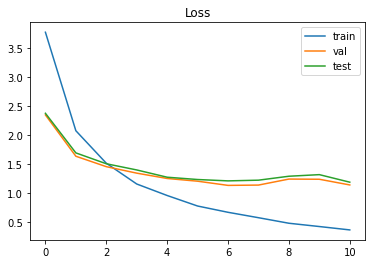

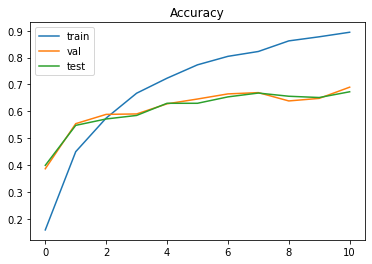

In [16]:
# train
import time
import matplotlib.pyplot as plt
# Start training
# HINT:
# - change the number of epochs as you want
# - you can always interrupt training by clicking on the "interrupt kernel" on the toolbar
# - you can set a small number of epochs, train for a while, plot losses, and then train again
# - in general, training for at most 50 epochs will be ok
# Compute forward time

try:
  for epoch in range(50):
    #print("\n\n epoch :  ", epoch ,"\n") 
    # Initialize variables for computing average loss/accuracy
    sum_loss = {"train": 0, "val": 0, "test": 0}
    sum_accuracy = {"train": 0, "val": 0, "test": 0}
    # Process each split
    for split in ["train", "val", "test"]:
        # Set network mode (train or eval)
        if split == 'train':
          model.train()
        else: model.eval()
        # Process all data in split
        for i,(input,labels) in enumerate(loaders[split]):
            # Read data
            print("\nSplit: --> ", split, "  Index --> ", i ,"  Epoch --> ",epoch )
            # Move to CUDA
            input = input.to(dev)
            labels = labels.to(dev)
            
            # Compute loss
            start_time = time.time()
            optimizer.zero_grad()
            pred = model(input)
            loss = F.cross_entropy(pred, labels)
            end_time = time.time()
            forward_time = end_time - start_time
            #print(f"Forward time: {forward_time:.4f} seconds")

            # Update variables for average epoch loss
            sum_loss[split] += loss.item()
            # Compute accuracy
            _,pred_labels = pred.max(1) #prende la predizione con la massima probabilità ovvero quella del neurone che si è attivato di più
            batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
            # Update variables for average epoch accuracy
            sum_accuracy[split] += batch_accuracy
            #print("(pred_labels == labels).sum().item()", (pred_labels == labels).sum().item(), "  input.size(0) ", input.size(0))
            #print(" loss:  ", loss.item() ,"   batch_accuracy:  ", batch_accuracy,  "pred_labels ", pred_labels, "  labels :", labels)
            # Backward and optimize
            if split == "train":
              #compute gradients
              start_time = time.time()
              loss.backward()
              end_time = time.time()
              backward_time = end_time - start_time
              #print(f"Backward time: {backward_time:.5f} seconds")
              #optimize
              optimizer.step()
    # Compute average epoch loss/accuracy
    epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}      
    epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}  
    # Append average values to history lists
    for split in ["train", "val", "test"]:
      history_loss[split].append(epoch_loss[split])
      history_accuracy[split].append(epoch_accuracy[split])
    
    print("epoch_accuracy[val] -->  ", epoch_accuracy["val"])
    print("best_val_accuracy", best_val_accuracy)

    # Check if we obtained the best validation accuracy
    if epoch_accuracy["val"] > best_val_accuracy:
      # Update best validation accuracy and test accuracy at best validation
      best_val_accuracy = epoch_accuracy["val"]
      test_accuracy_at_best_val = epoch_accuracy["test"]
      epoch_at_best_val_accuracy = epoch
      min_val_loss = epoch_loss["val"]
      print("test_accuracy_at_best_val   -->  ", test_accuracy_at_best_val)

    # Print info
    print(f"\n\n\n Epoch {epoch+1}:",
          f"TrL={epoch_loss['train']:.4f},",
          f"TrA={epoch_accuracy['train']:.4f},",
          f"VL={epoch_loss['val']:.4f},",
          f"VA={epoch_accuracy['val']:.4f},",
          f"TeL={epoch_loss['test']:.4f},",
          f"TeA={epoch_accuracy['test']:.4f},")
    print("\n")
    print("test_accuracy_at_best_val   -->  ", test_accuracy_at_best_val, 
          "  best_val_accuracy --> ", best_val_accuracy, 
          "  epoch_at_best_val_accuracy -->", epoch_at_best_val_accuracy,
          "  min_val_loss --> ", min_val_loss )

except KeyboardInterrupt:
  print("Interrupted")

finally:
    print("\n")
    print("test_accuracy_at_best_val   -->  ", test_accuracy_at_best_val, 
          "  best_val_accuracy --> ", best_val_accuracy, 
          "  epoch_at_best_val_accuracy -->", epoch_at_best_val_accuracy,
          "  min_val_loss --> ", min_val_loss )
    # Plot loss
    print("\n\n\n" )
    plt.title("Loss")
    for split in ["train", "val", "test"]:
        plt.plot(history_loss[split], label=split)
    plt.legend()
    plt.show()
    # Plot accuracy
    plt.title("Accuracy")
    for split in ["train", "val", "test"]:
        plt.plot(history_accuracy[split], label=split)
    plt.legend()
    plt.show()

In [17]:
# Print test accuracy at best validation accuracy
print(f"Final test accuracy {test_accuracy_at_best_val:.4f}")

Final test accuracy 0.6726


In [18]:
print("epoch_accuracy[val] -->  ", epoch_accuracy["val"])
print("best_val_accuracy", best_val_accuracy)

epoch_accuracy[val] -->   0.6896825396825397
best_val_accuracy 0.6896825396825397


Predicted: 34 (correct: 34)


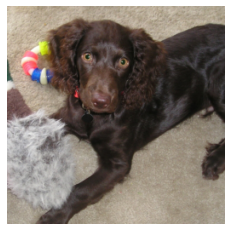

In [21]:
import random

# Get random sample from test set
idx = random.randint(0, len(dog_test_dataset)-1)
input, label = dog_test_dataset[idx]
# Normalize and show image
input_show = (input - input.min())/(input.max() - input.min())
plt.imshow(input_show.permute(1,2,0).numpy())
plt.axis('off')
# Predict class
model.eval()
with torch.no_grad():
    output = model(input.unsqueeze(0).to(dev))
_,pred = output.max(1)
pred = pred.item()
print(f"Predicted: {pred} (correct: {label})")

In [22]:
print("\n")
print("test_accuracy_at_best_val   -->  ", test_accuracy_at_best_val, 
      "  best_val_accuracy --> ", best_val_accuracy, 
      "  epoch_at_best_val_accuracy -->", epoch_at_best_val_accuracy,
      "  min_val_loss --> ", min_val_loss )



test_accuracy_at_best_val   -->   0.6726190476190477   best_val_accuracy -->  0.6896825396825397   epoch_at_best_val_accuracy --> 10   min_val_loss -->  1.1370144769371975


In [24]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
features.0.weight 	 torch.Size([64, 3, 11, 11])
features.0.bias 	 torch.Size([64])
features.3.weight 	 torch.Size([192, 64, 5, 5])
features.3.bias 	 torch.Size([192])
features.6.weight 	 torch.Size([384, 192, 3, 3])
features.6.bias 	 torch.Size([384])
features.8.weight 	 torch.Size([256, 384, 3, 3])
features.8.bias 	 torch.Size([256])
features.10.weight 	 torch.Size([256, 256, 3, 3])
features.10.bias 	 torch.Size([256])
fc_layers.0.weight 	 torch.Size([4096, 12544])
fc_layers.0.bias 	 torch.Size([4096])
fc_layers.3.weight 	 torch.Size([133, 4096])
fc_layers.3.bias 	 torch.Size([133])
Optimizer's state_dict:
state 	 {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}, 2: {'momentum_buffer': None}, 3: {'momentum_buffer': None}, 4: {'momentum_buffer': None}, 5: {'momentum_buffer': None}, 6: {'momentum_buffer': None}, 7: {'momentum_buffer': None}, 8: {'momentum_buffer': None}, 9: {'momentum_buffer': None}, 10: {'momentum_buffer': None}, 11: {'momentum_buffer': N

###Primo modello dopo 12 epoche

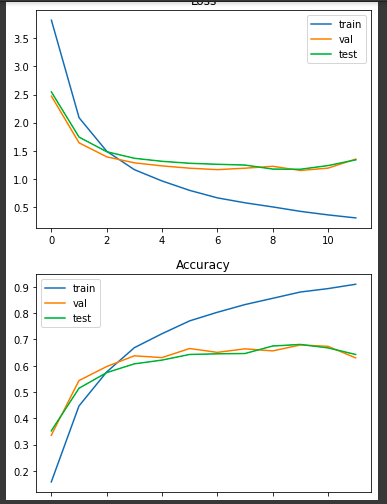

###secondo modello dopo 12 epoche

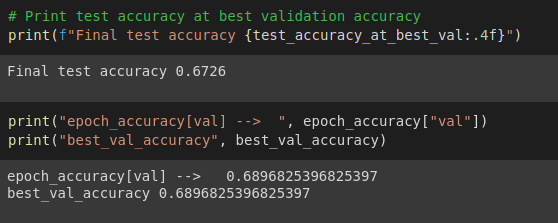

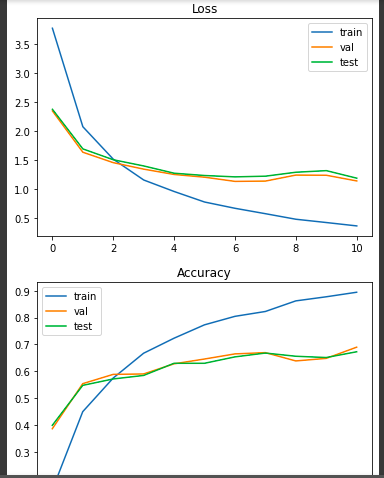